In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("GlobalWeatherRepository.csv")




In [ ]:
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65868,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1745138700,2025-04-20 04:45,26.1,79.0,Light rain shower,...,16.835,18.870,2,2,06:14 AM,06:39 PM,12:24 AM,12:07 PM,Last Quarter,59
65869,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1745139600,2025-04-20 16:00,33.2,91.8,Patchy light rain in area with thunder,...,74.740,77.885,4,10,05:34 AM,06:17 PM,No moonrise,10:45 AM,Waning Gibbous,64
65870,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1745139600,2025-04-20 12:00,24.6,76.2,Sunny,...,36.260,252.340,2,4,05:46 AM,06:18 PM,No moonrise,11:15 AM,Waning Gibbous,62
65871,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1745139600,2025-04-20 11:00,17.2,62.9,Patchy rain nearby,...,5.735,6.475,1,1,06:15 AM,05:56 PM,11:51 PM,12:25 PM,Waning Gibbous,62


In [ ]:
# Convert to datetime and set index
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df = df.dropna(subset=['last_updated'])
df.set_index('last_updated', inplace=True)

In [ ]:
df.describe().T.sort_values(by="std", ascending=False)


,count,mean,std,min,25%,50%,75%,max
last_updated_epoch,65873.0,1.730527e+09,8.498207e+06,1.715849e+09,1.723293e+09,1.730539e+09,1.737886e+09,1.745140e+09
air_quality_Carbon_Monoxide,65873.0,5.278665e+02,9.168934e+02,-9.999000e+03,2.303000e+02,3.293000e+02,5.106000e+02,3.887940e+04
air_quality_PM10,65873.0,5.270115e+01,1.620922e+02,-1.848150e+03,9.250000e+00,2.130000e+01,4.643500e+01,6.037290e+03
wind_degree,65873.0,1.687703e+02,1.037576e+02,1.000000e+00,8.000000e+01,1.600000e+02,2.560000e+02,3.600000e+02
longitude,65873.0,2.217517e+01,6.582373e+01,-1.752000e+02,-6.836100e+00,2.331670e+01,5.058000e+01,1.792200e+02
air_quality_Sulphur_dioxide,65873.0,1.142253e+01,4.697146e+01,-9.999000e+03,7.400000e-01,2.400000e+00,9.065000e+00,5.213300e+02
air_quality_PM2.5,65873.0,2.584146e+01,4.379723e+01,1.850000e-01,6.100000e+00,1.420000e+01,3.015500e+01,1.614100e+03
air_quality_Ozone,65873.0,6.384507e+01,3.546289e+01,0.000000e+00,4.000000e+01,6.100000e+01,8.300000e+01,4.807000e+02
moon_illumination,65873.0,5.044387e+01,3.506963e+01,0.000000e+00,1.600000e+01,5.100000e+01,8.500000e+01,1.000000e+02
cloud,65873.0,4.010715e+01,3.392905e+01,0.000000e+00,3.000000e+00,3.200000e+01,7.500000e+01,1.000000e+02


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65873 entries, 2024-05-16 13:15:00 to 2025-04-20 10:45:00
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       65873 non-null  object 
 1   location_name                 65873 non-null  object 
 2   latitude                      65873 non-null  float64
 3   longitude                     65873 non-null  float64
 4   timezone                      65873 non-null  object 
 5   last_updated_epoch            65873 non-null  int64  
 6   temperature_celsius           65873 non-null  float64
 7   temperature_fahrenheit        65873 non-null  float64
 8   condition_text                65873 non-null  object 
 9   wind_mph                      65873 non-null  float64
 10  wind_kph                      65873 non-null  float64
 11  wind_degree                   65873 non-null  int64  
 12  wind_direction           

In [ ]:
df.isna().sum().sort_values(ascending=False)


,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0
wind_mph,0


In [ ]:
# Handle missing numeric values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


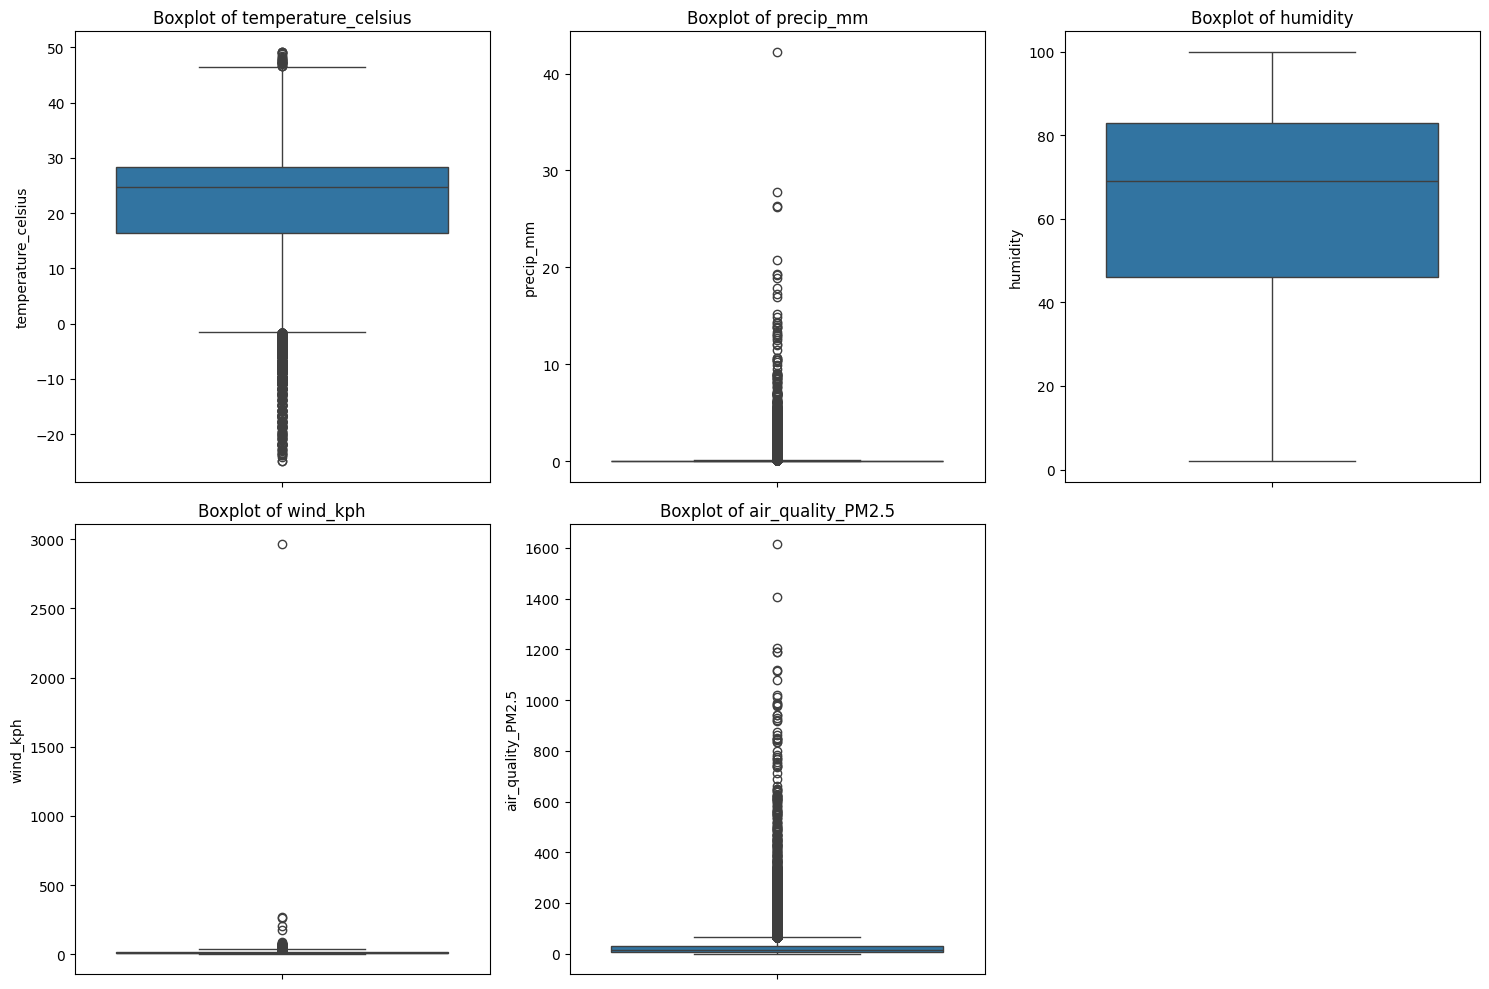

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick relevant weather variables to inspect
features_to_plot = ['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph', 'air_quality_PM2.5']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Display IQR values and outlier thresholds
for col in features_to_plot:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} - Outliers: {len(outliers)} (Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f})")


temperature_celsius - Outliers: 982 (Lower: -1.60, Upper: 46.40)
precip_mm - Outliers: 12368 (Lower: -0.04, Upper: 0.07)
humidity - Outliers: 0 (Lower: -9.50, Upper: 138.50)
wind_kph - Outliers: 991 (Lower: -11.35, Upper: 36.25)
air_quality_PM2.5 - Outliers: 5223 (Lower: -29.98, Upper: 66.24)


In [ ]:
# Outlier removal using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Normalize numeric columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Resample data to daily average
df_daily = df.resample('D').mean(numeric_only=True)

In [ ]:
df_daily

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,
2024-05-16,0.072536,0.038358,-1.564349,0.020156,0.020180,0.169026,0.170051,0.030816,0.037609,0.037969,...,0.249583,-0.310265,-0.353590,-0.264996,-0.192233,-0.608285,-0.395380,-0.435087,-0.480586,0.136625
2024-05-17,0.145504,0.056944,-1.552246,-0.001244,-0.001147,0.283320,0.282585,0.054509,-0.023447,-0.021011,...,0.429129,-0.443115,-0.101508,-0.033696,-0.146666,-0.589005,-0.362271,-0.466114,-0.488141,0.393220
2024-05-18,0.123703,0.180141,-1.543095,0.198068,0.197615,0.083374,0.083034,0.077469,-0.135959,-0.139963,...,0.266403,-0.359696,-0.057824,-0.275033,-0.169623,-0.540702,-0.216974,-0.444602,-0.430592,0.642116
2024-05-19,0.043789,0.108867,-1.532884,0.245008,0.244778,0.069355,0.068599,0.022883,-0.289737,-0.289329,...,0.205015,-0.453508,0.008514,-0.435977,-0.288010,-0.473171,-0.125040,-0.380193,-0.379269,0.877898
2024-05-20,0.063058,0.072564,-1.522546,0.171837,0.171594,0.153547,0.153137,0.057298,-0.077106,-0.079085,...,0.288347,-0.439257,-0.093392,-0.298005,-0.171646,-0.596169,-0.304685,-0.406952,-0.444246,1.077472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-16,0.177455,0.007713,1.813018,-0.417319,-0.417153,0.068178,0.067575,-0.114847,0.113526,0.111193,...,-0.009791,0.175609,-0.096757,0.371990,0.090926,0.272813,0.293859,0.205336,0.255365,1.196266
2025-04-17,0.108357,0.053281,1.823026,-0.110203,-0.110124,0.019384,0.019388,-0.017765,0.068263,0.066259,...,-0.107425,0.321614,-0.260833,0.471933,0.176541,0.598717,0.474699,0.632569,0.528406,1.034706
2025-04-18,0.115848,-0.133270,1.833296,-0.179540,-0.179184,0.005486,0.005680,0.047894,0.044963,0.041702,...,-0.058599,0.164311,0.020589,0.252061,0.238182,0.375886,0.350572,0.324942,0.247626,0.829570


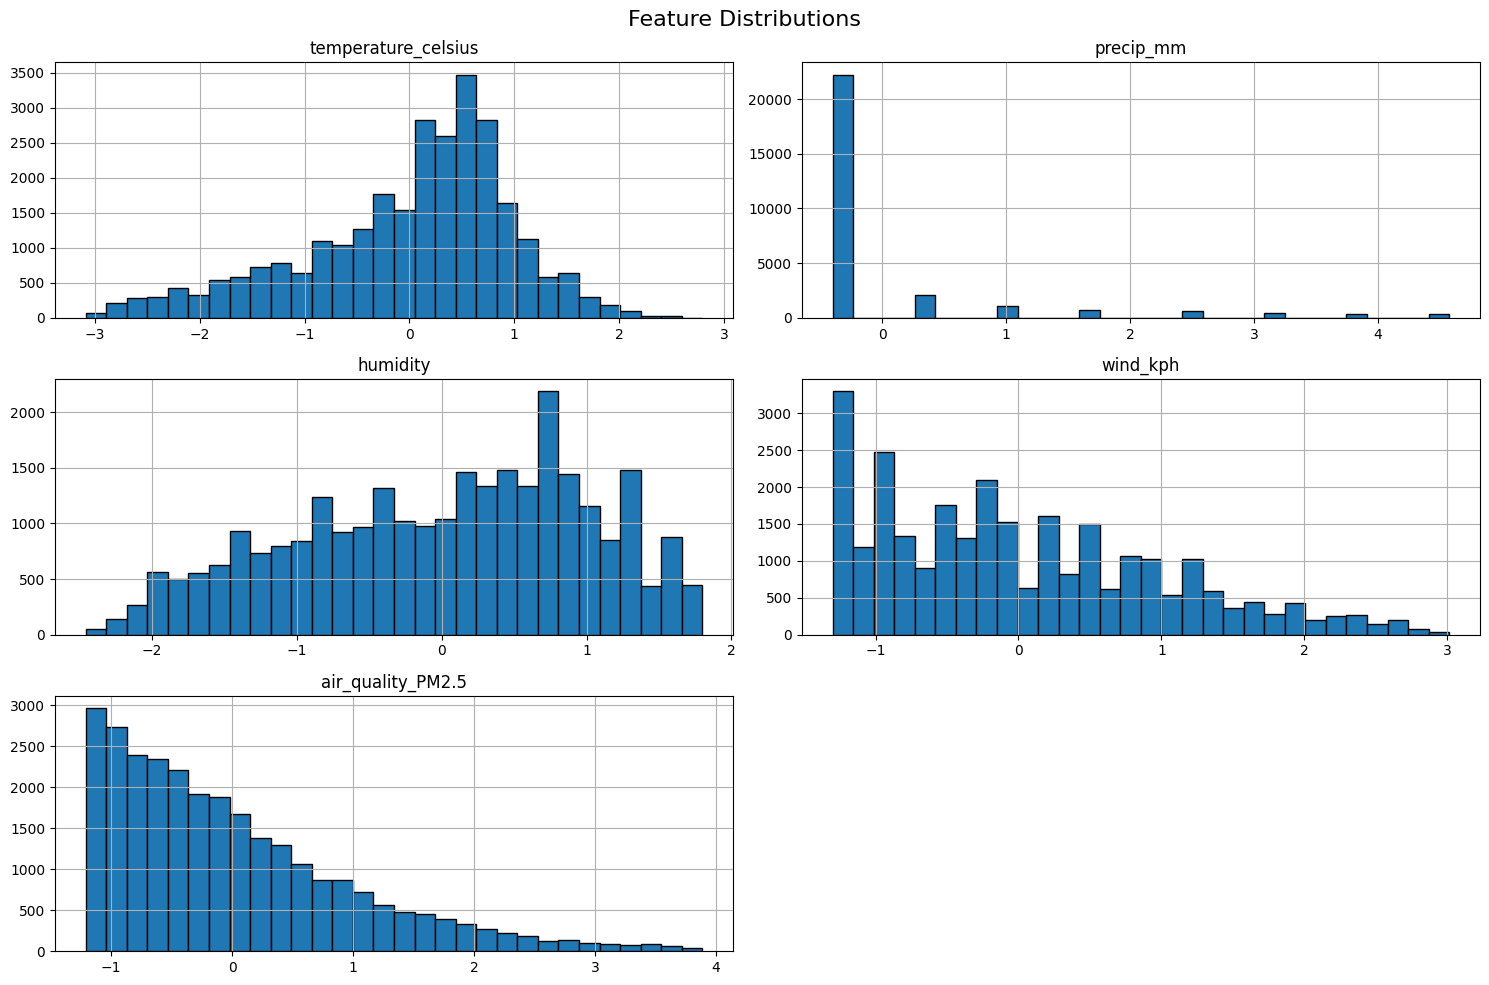

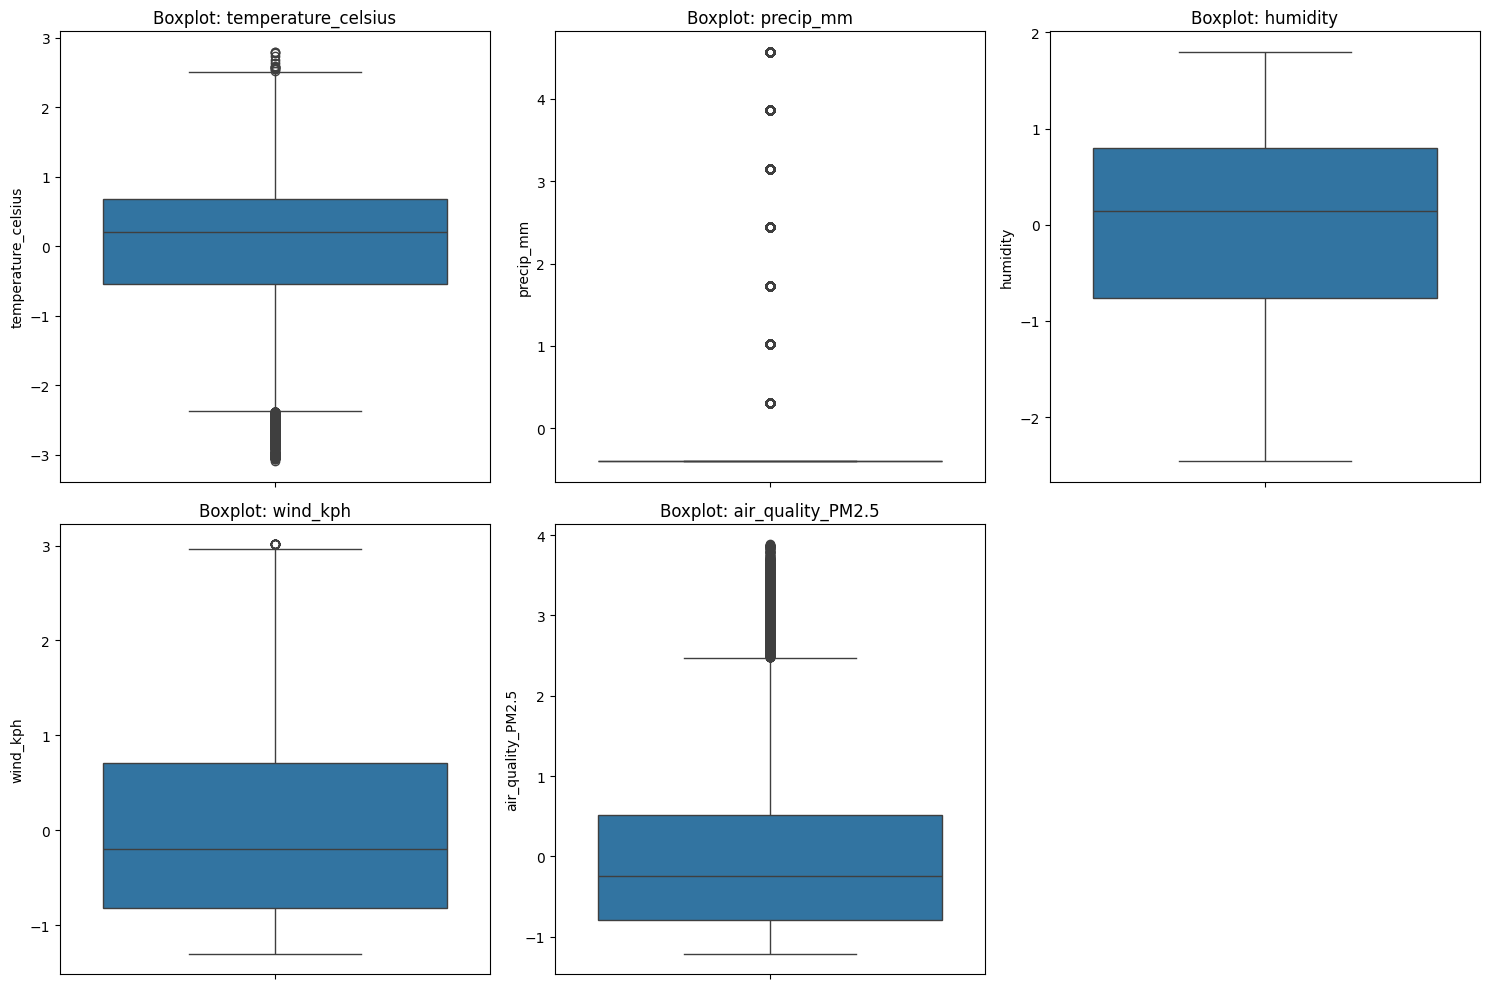

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to visualize
features = ['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph', 'air_quality_PM2.5']

# Histograms
df[features].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


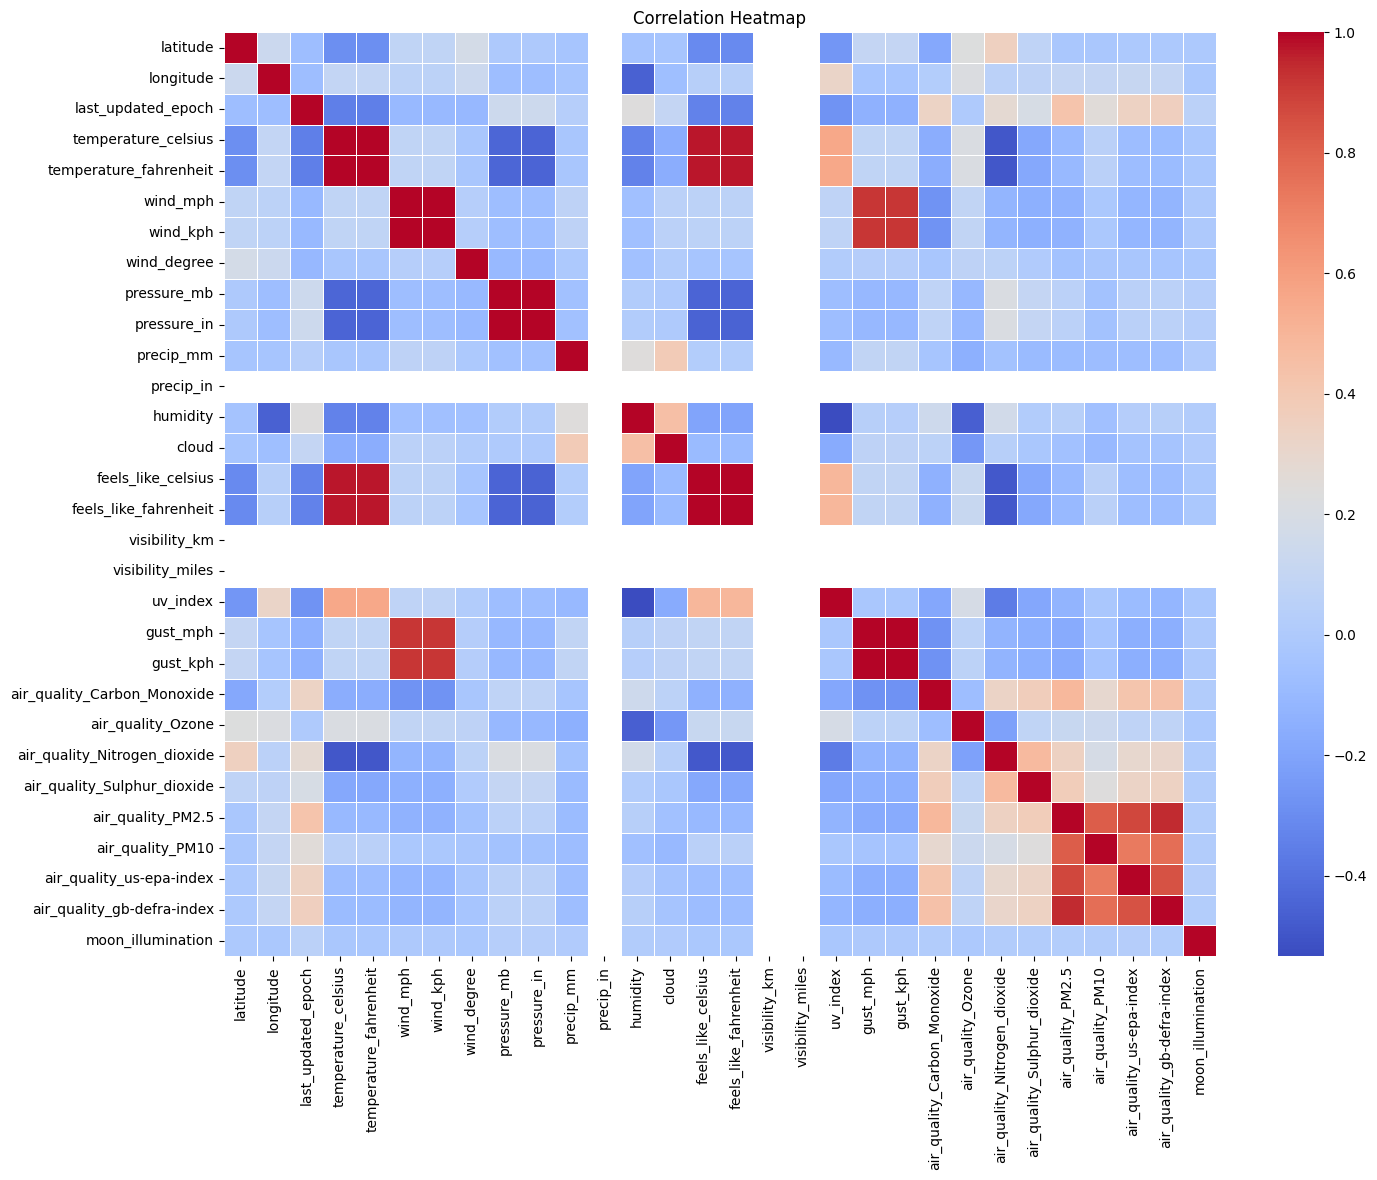

Top correlated with temperature_celsius:
 temperature_fahrenheit    0.999995
feels_like_celsius        0.975076
feels_like_fahrenheit     0.975072
uv_index                  0.561634
air_quality_Ozone         0.210556
longitude                 0.093002
gust_kph                  0.081601
gust_mph                  0.081568
wind_kph                  0.079713
wind_mph                  0.079669
Name: temperature_celsius, dtype: float64


In [ ]:
# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Top correlations with temperature
print("Top correlated with temperature_celsius:\n", corr['temperature_celsius'].drop('temperature_celsius').sort_values(ascending=False).head(10))


In [ ]:
drop_cols = [
    'temperature_fahrenheit', 'feels_like_fahrenheit',
    'wind_mph', 'precip_in', 'pressure_in', 'visibility_miles', 'gust_mph'
]

df = df.drop(columns=drop_cols)
print("Dropped redundant columns to reduce multicollinearity.")


Dropped redundant columns to reduce multicollinearity.


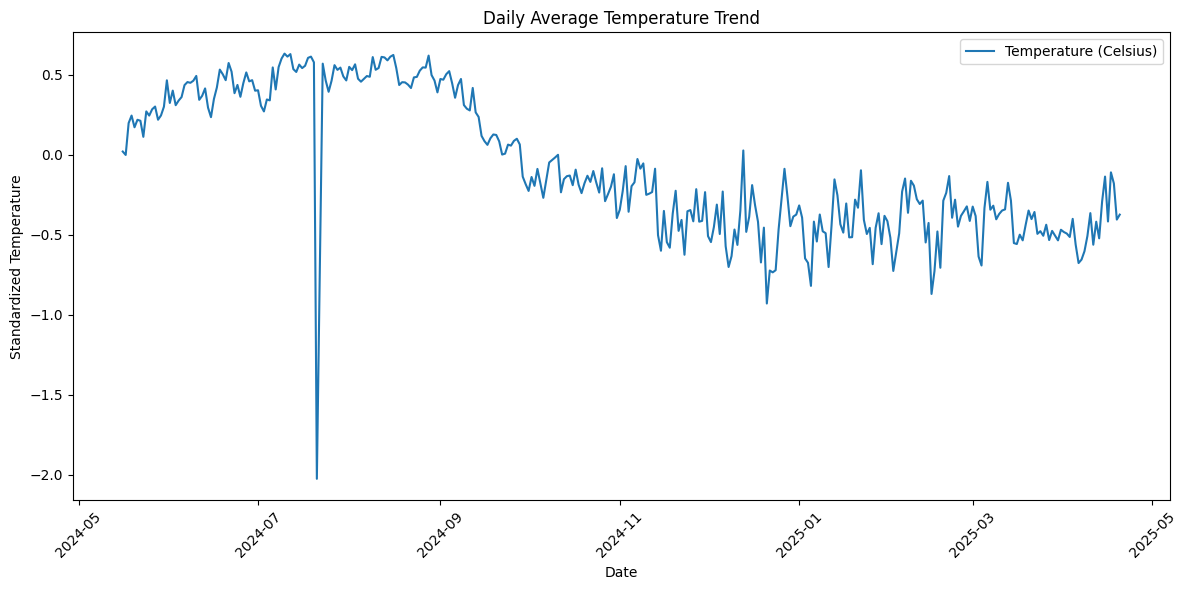

In [ ]:
# Plot temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y='temperature_celsius', label='Temperature (Celsius)')
plt.title('Daily Average Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Standardized Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

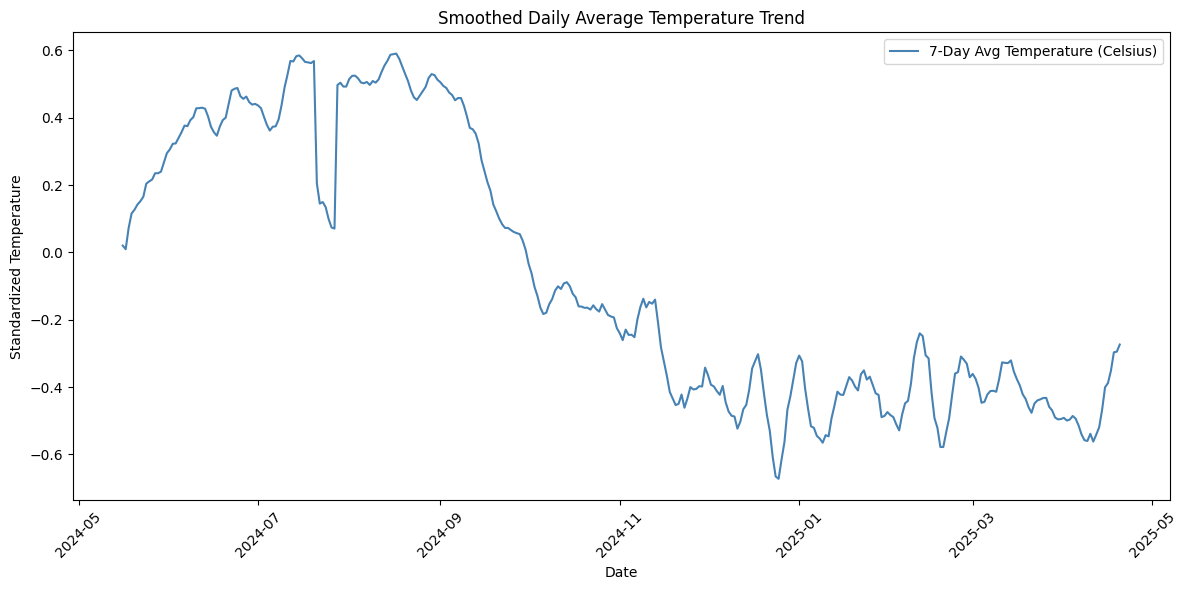

In [ ]:
# Apply 7-day moving average to smooth temperature
df_daily['temp_c_smooth'] = df_daily['temperature_celsius'].rolling(window=7, min_periods=1).mean()

# Plot smoothed temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y='temp_c_smooth', label='7-Day Avg Temperature (Celsius)', color='steelblue')
plt.title('Smoothed Daily Average Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Standardized Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


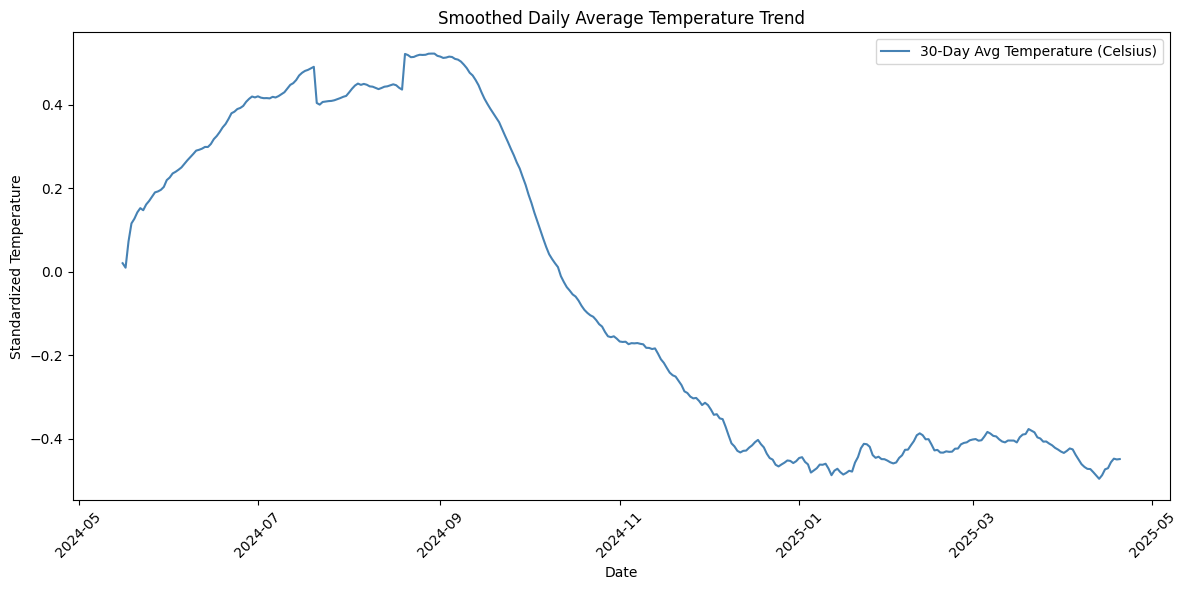

In [ ]:
# Apply 30-day moving average to smooth temperature
df_daily['temp_c_smooth'] = df_daily['temperature_celsius'].rolling(window=30, min_periods=1).mean()

# Plot smoothed temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y='temp_c_smooth', label='30-Day Avg Temperature (Celsius)', color='steelblue')
plt.title('Smoothed Daily Average Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Standardized Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

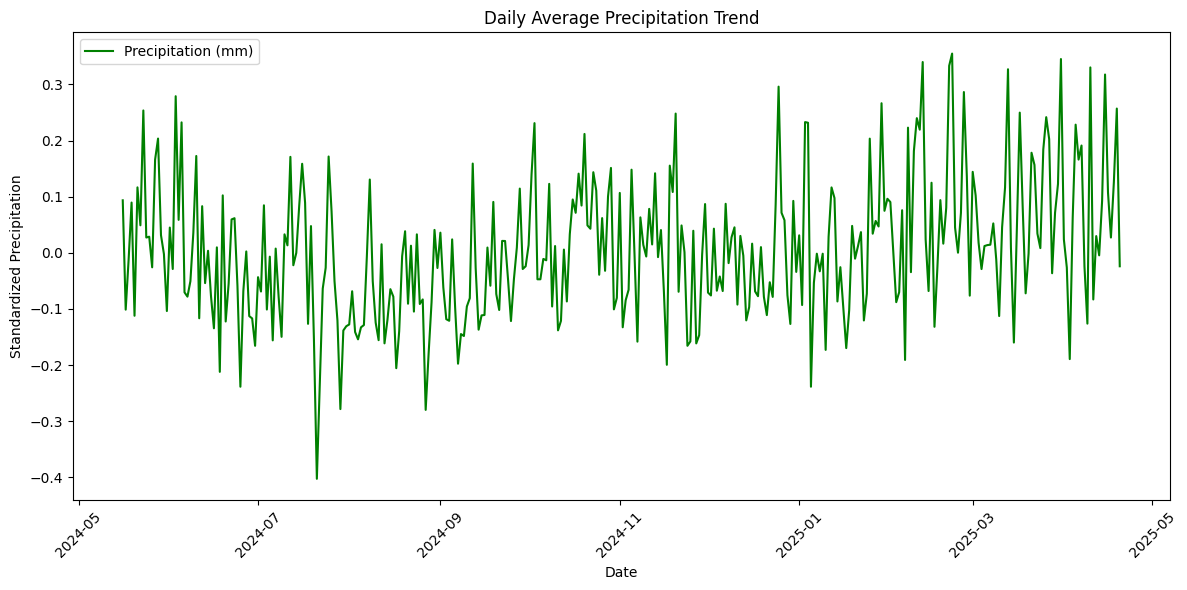

In [ ]:
# Plot precipitation trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y='precip_mm', label='Precipitation (mm)', color='green')
plt.title('Daily Average Precipitation Trend')
plt.xlabel('Date')
plt.ylabel('Standardized Precipitation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

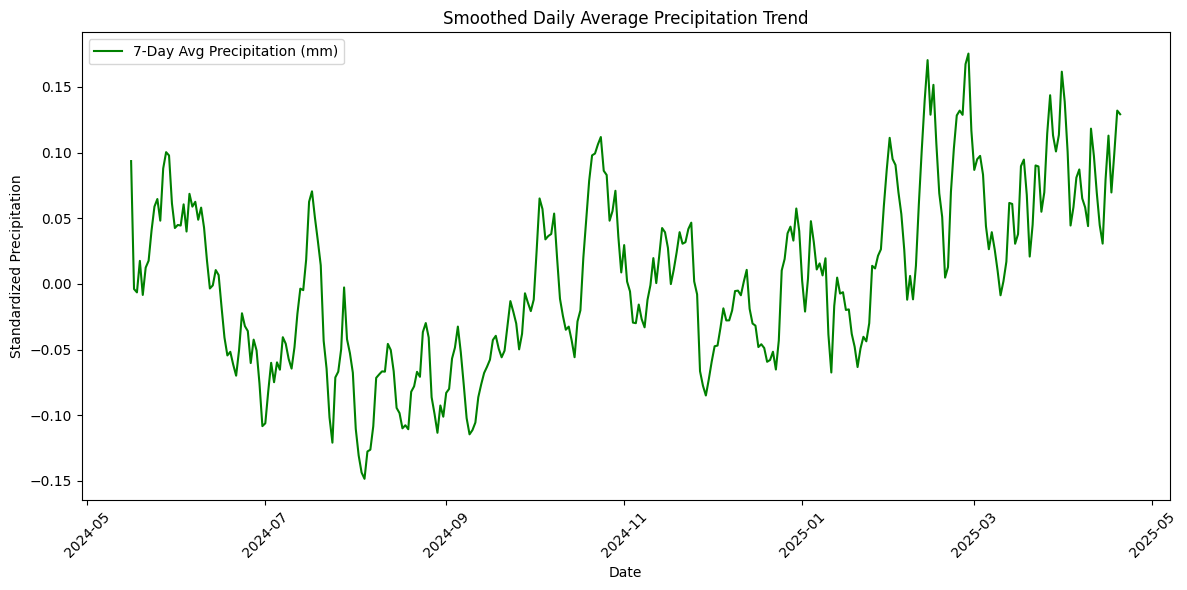

In [ ]:
# Apply 7-day moving average to smooth precipitation
df_daily['precip_mm_smooth'] = df_daily['precip_mm'].rolling(window=7, min_periods=1).mean()

# Plot smoothed precipitation trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y='precip_mm_smooth', label='7-Day Avg Precipitation (mm)', color='green')
plt.title('Smoothed Daily Average Precipitation Trend')
plt.xlabel('Date')
plt.ylabel('Standardized Precipitation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


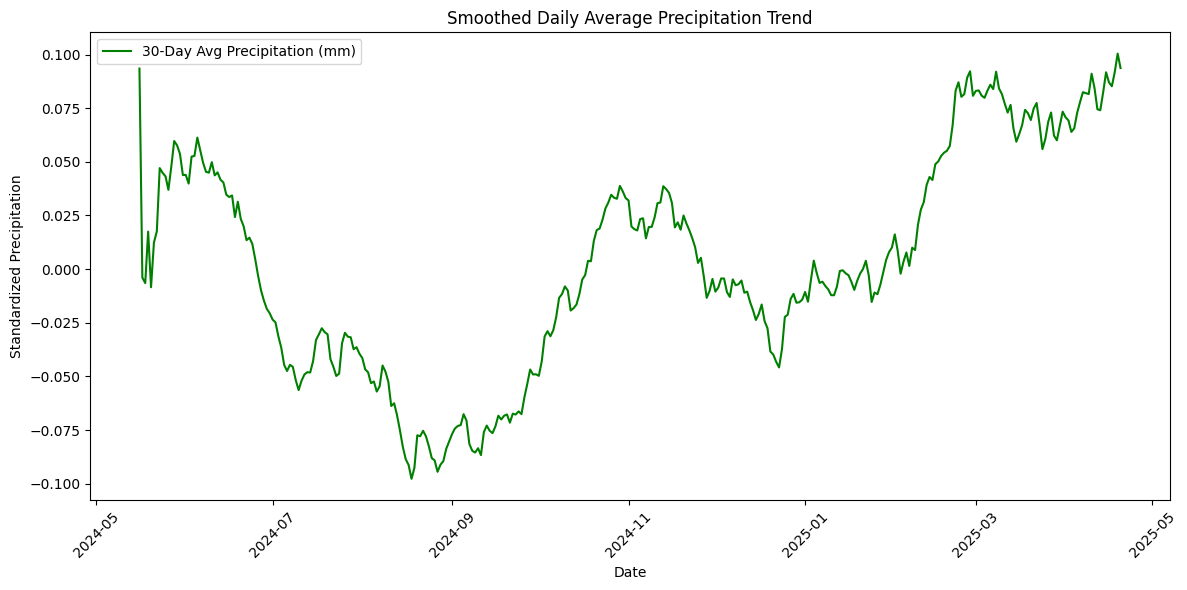

In [ ]:
# Apply 30-day moving average to smooth precipitation
df_daily['precip_mm_smooth'] = df_daily['precip_mm'].rolling(window=30, min_periods=1).mean()

# Plot smoothed precipitation trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y='precip_mm_smooth', label='30-Day Avg Precipitation (mm)', color='green')
plt.title('Smoothed Daily Average Precipitation Trend')
plt.xlabel('Date')
plt.ylabel('Standardized Precipitation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-124-d5355518e110>:12: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-124-d5355518e110>:12: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


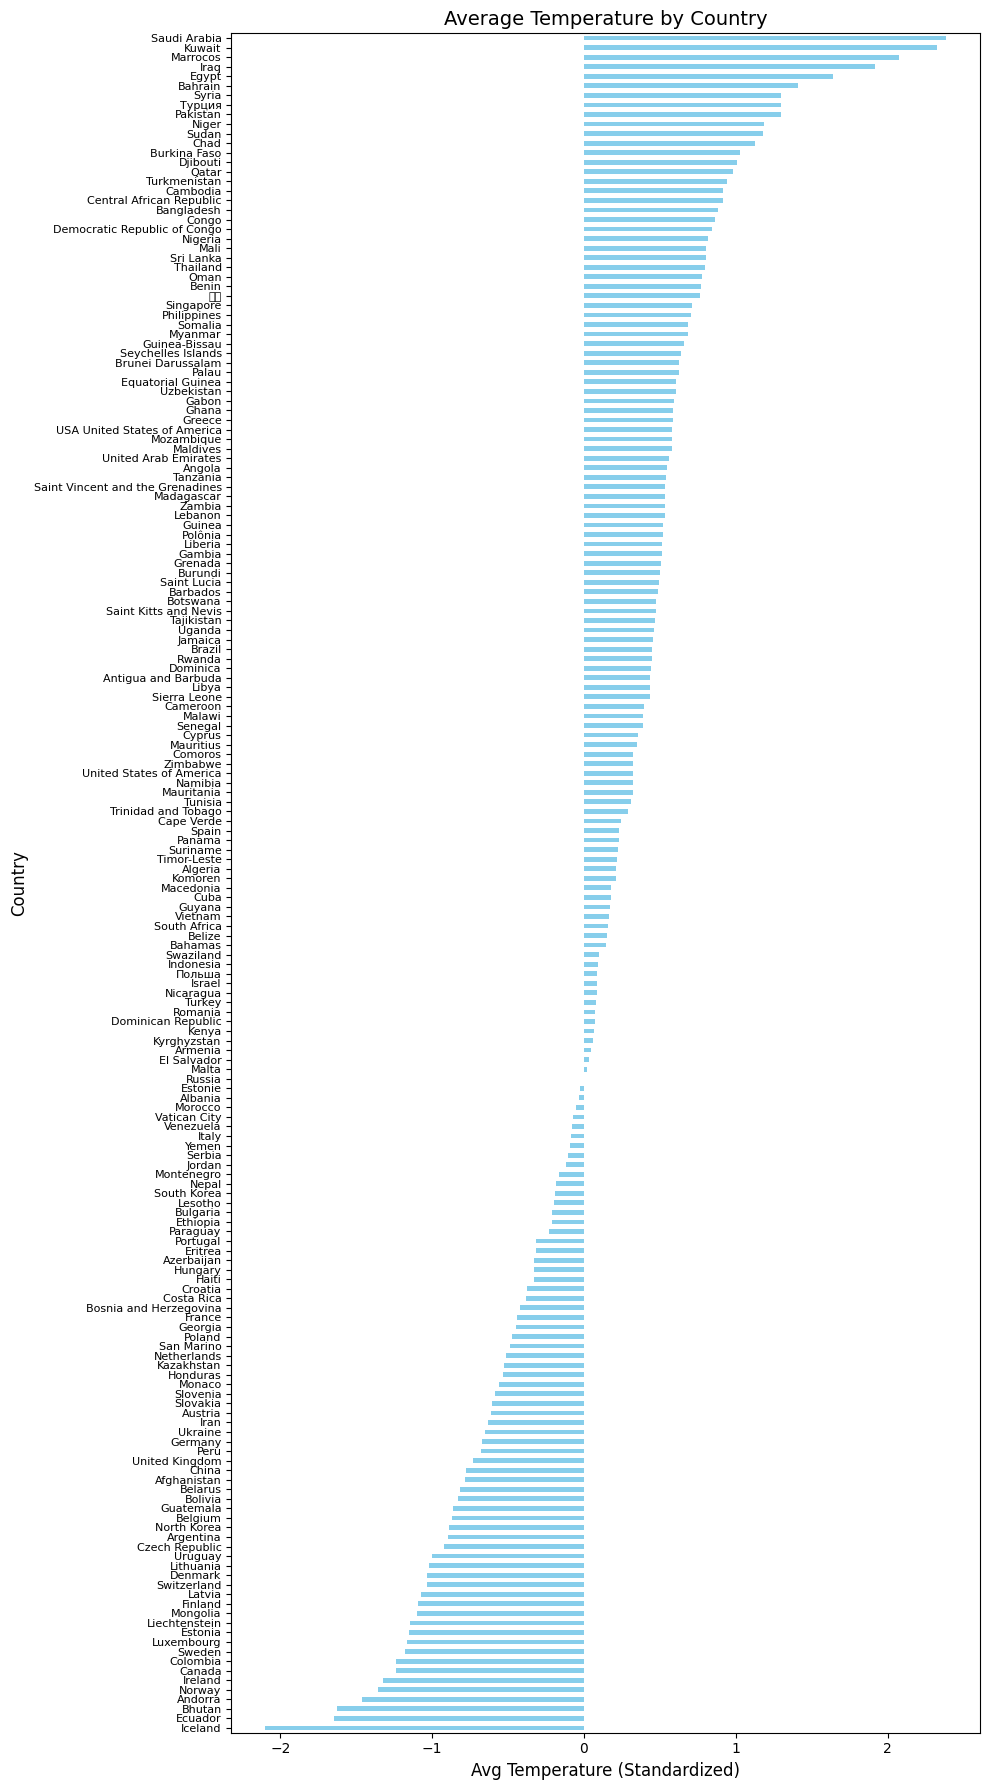

In [ ]:
# Country-wise average temperature, sorted
grouped = df.groupby('country')['temperature_celsius'].mean().sort_values()

# Plot with better readability
plt.figure(figsize=(10, 18))  # Increase height
grouped.plot(kind='barh', color='skyblue')
plt.title('Average Temperature by Country', fontsize=14)
plt.xlabel('Avg Temperature (Standardized)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)  # Reduce font size for country names
plt.tight_layout()
plt.show()



Feature importance with Random Forest

RMSE: 0.05295698499210345
R² Score: 0.9971849409520164


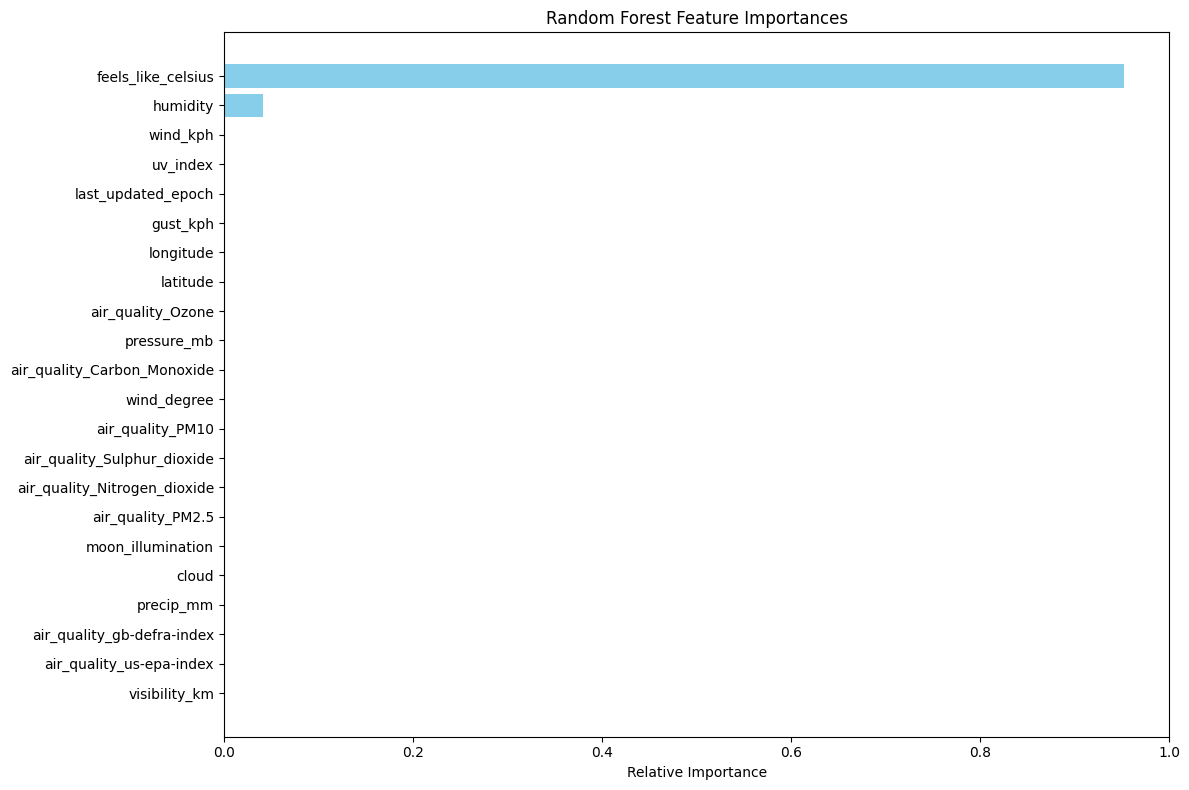

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select numeric features
df_numeric = df.select_dtypes(include=np.number).copy()

# Drop the target from feature set
target = 'temperature_celsius'
X = df_numeric.drop(columns=[target])
y = df_numeric[target]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate model
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Step 5: Plot feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title('Random Forest Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


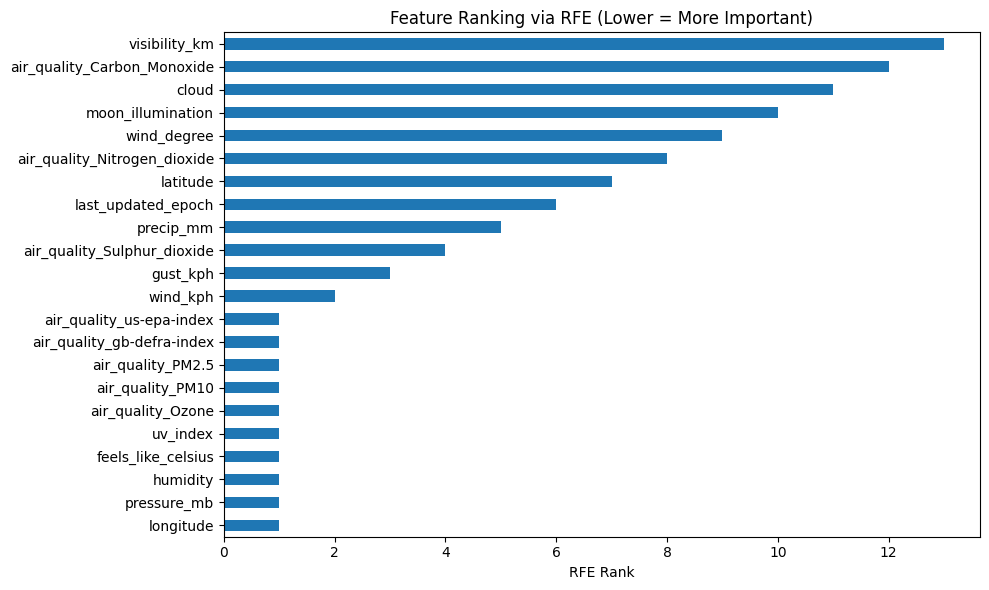

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use linear regression as estimator (or try RandomForest/XGBoost)
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(X, y)

# Get ranking
rfe_ranks = pd.Series(rfe.ranking_, index=X.columns).sort_values()

# Plot
plt.figure(figsize=(10, 6))
rfe_ranks.plot(kind='barh')
plt.title("Feature Ranking via RFE (Lower = More Important)")
plt.xlabel("RFE Rank")
plt.tight_layout()
plt.show()


In [ ]:
!pip install shap


In [ ]:

!pip install statsmodels


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


# Drop features that can cause data leakage
df = df.drop(columns=[col for col in ['feels_like_celsius', 'feels_like_fahrenheit'] if col in df.columns])

# Resample to daily means
df_daily = df.resample('D').mean(numeric_only=True)

# Target for forecasting
target = 'temperature_celsius'
ts = df_daily[target].dropna()


In [ ]:
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,condition_text,wind_kph,wind_degree,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,
2024-05-16 13:15:00,Afghanistan,Kabul,0.608105,1.251875,Asia/Kabul,-1.565397,0.384106,Partly Cloudy,-0.009263,1.661677,...,-0.445860,0.265569,-0.672958,-0.710383,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,0.136625
2024-05-16 04:45:00,Antigua and Barbuda,Saint John's,-0.071226,-1.445970,America/Antigua,-1.565397,0.309938,Partly cloudy,-0.581956,-0.725947,...,-1.131467,-0.877553,-0.672958,-0.710383,05:36 AM,06:32 PM,01:05 PM,01:14 AM,Waxing Gibbous,0.136625
2024-05-16 05:45:00,Argentina,Buenos Aires,-2.090088,-1.380496,America/Argentina/Buenos_Aires,-1.565397,-1.915099,Clear,-1.301153,-1.496149,...,-0.864842,-0.836173,-0.672958,-0.710383,07:43 AM,05:59 PM,02:36 PM,01:04 AM,Waxing Gibbous,0.136625
2024-05-16 10:45:00,Austria,Vienna,1.142200,0.164542,Europe/Vienna,-1.565397,-0.926194,Partly cloudy,0.909711,-0.533397,...,-0.893409,-0.882726,-0.672958,-0.710383,05:14 AM,08:29 PM,01:00 PM,02:42 AM,Waxing Gibbous,0.136625
2024-05-16 12:45:00,Azerbaijan,Baku,0.837672,0.854497,Asia/Baku,-1.565397,-0.802580,Partly cloudy,-0.874962,-1.399874,...,-1.064811,-0.996521,-0.672958,-0.710383,05:23 AM,07:51 PM,12:54 PM,02:10 AM,Waxing Gibbous,0.136625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-20 13:00:00,United Arab Emirates,Abu Dhabi,0.215604,0.946876,Asia/Dubai,1.853360,0.680778,Sunny,0.616705,1.286204,...,1.660954,1.138428,1.230014,1.441856,05:56 AM,06:47 PM,12:36 AM,11:11 AM,Waning Gibbous,0.364709
2025-04-20 10:00:00,United Kingdom,London,1.271706,-0.174695,Europe/London,1.853360,-1.754402,Partly cloudy,0.563431,-0.851105,...,-0.188757,-0.249095,-0.672958,-0.710383,05:54 AM,08:06 PM,03:11 AM,10:11 AM,Waning Gibbous,0.307688
2025-04-20 06:00:00,Uruguay,Montevideo,-2.100555,-1.329038,America/Montevideo,1.853360,-1.531898,Partly Cloudy,0.190514,0.487120,...,-0.135908,-0.258664,-0.672958,-0.710383,07:13 AM,06:14 PM,11:57 PM,02:03 PM,Last Quarter,0.279178


In [ ]:
# 80/20 split based on date
split_index = int(len(ts) * 0.8)
train, test = ts[:split_index], ts[split_index:]


In [ ]:
# Fit ARIMA model
model = ARIMA(train, order=(3, 1, 2))  # You can tune (p,d,q) or use auto_arima in advanced tasks
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
# Forecast future values (for test set length)
forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Evaluation Metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)

print(f"📊 Forecast Evaluation Metrics:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")


📊 Forecast Evaluation Metrics:
MAE:  0.1387
RMSE: 0.1765
MAPE: 0.3477


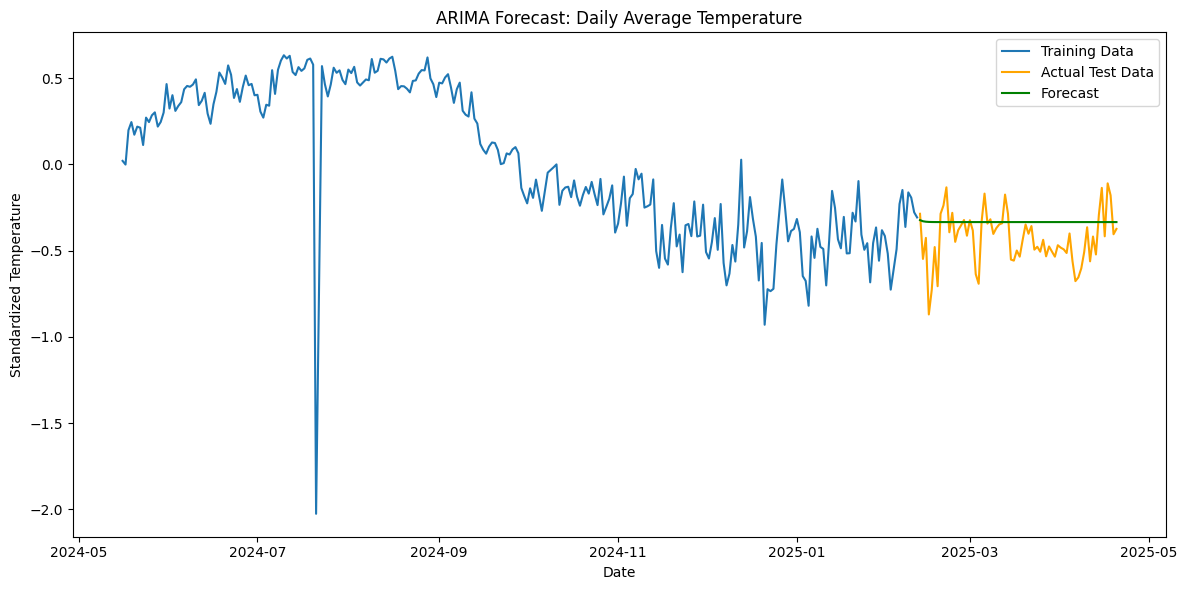

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('ARIMA Forecast: Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Standardized Temperature')
plt.legend()
plt.tight_layout()
plt.show()


ARIMA only uses past values of the target (univariate). It can’t “learn” from useful features like humidity, wind_kph, uv_index, etc.
It’s too simple for weather data, which usually involves seasonality, external influences, and non-linear trends.

📊 XGBoost Forecast Evaluation:
MAE:  0.2812
RMSE: 0.4071
MAPE: 1.3198


<ipython-input-136-0121a9511f07>:43: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


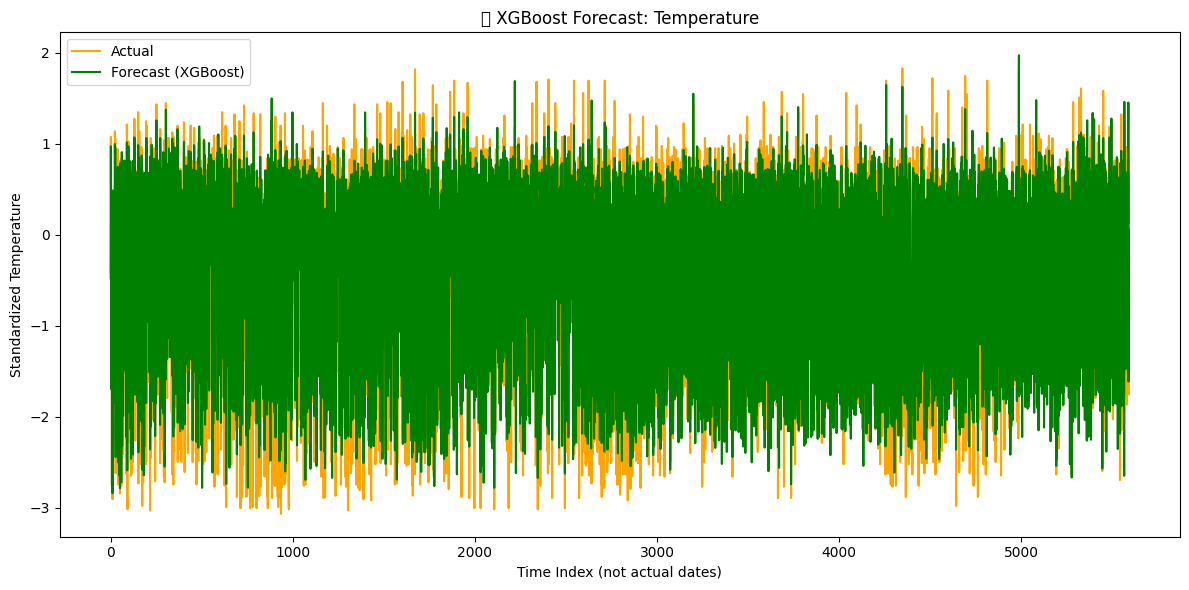

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

# Use the cleaned numeric dataset
df_ml = df.drop(columns=[col for col in ['feels_like_celsius', 'feels_like_fahrenheit'] if col in df.columns])
df_ml = df_ml.select_dtypes(include=np.number).dropna()

# Define features and target
X = df_ml.drop(columns=['temperature_celsius'])
y = df_ml['temperature_celsius']

# Split chronologically (important for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train model
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print("📊 XGBoost Forecast Evaluation:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='orange')
plt.plot(y_pred, label='Forecast (XGBoost)', color='green')
plt.title("📈 XGBoost Forecast: Temperature")
plt.xlabel("Time Index (not actual dates)")
plt.ylabel("Standardized Temperature")
plt.legend()
plt.tight_layout()
plt.show()


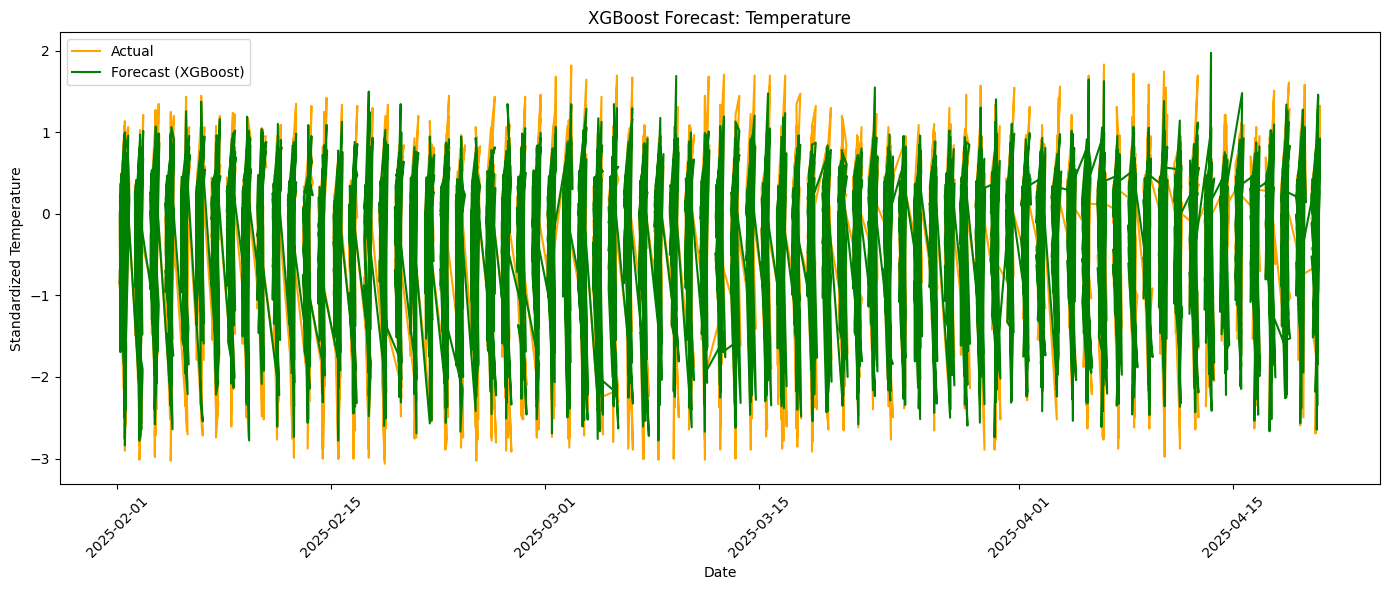

In [ ]:
# Plot with correct time index
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual', color='orange')
plt.plot(y_test.index, y_pred, label='Forecast (XGBoost)', color='green')
plt.title("XGBoost Forecast: Temperature")
plt.xlabel("Date")
plt.ylabel("Standardized Temperature")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


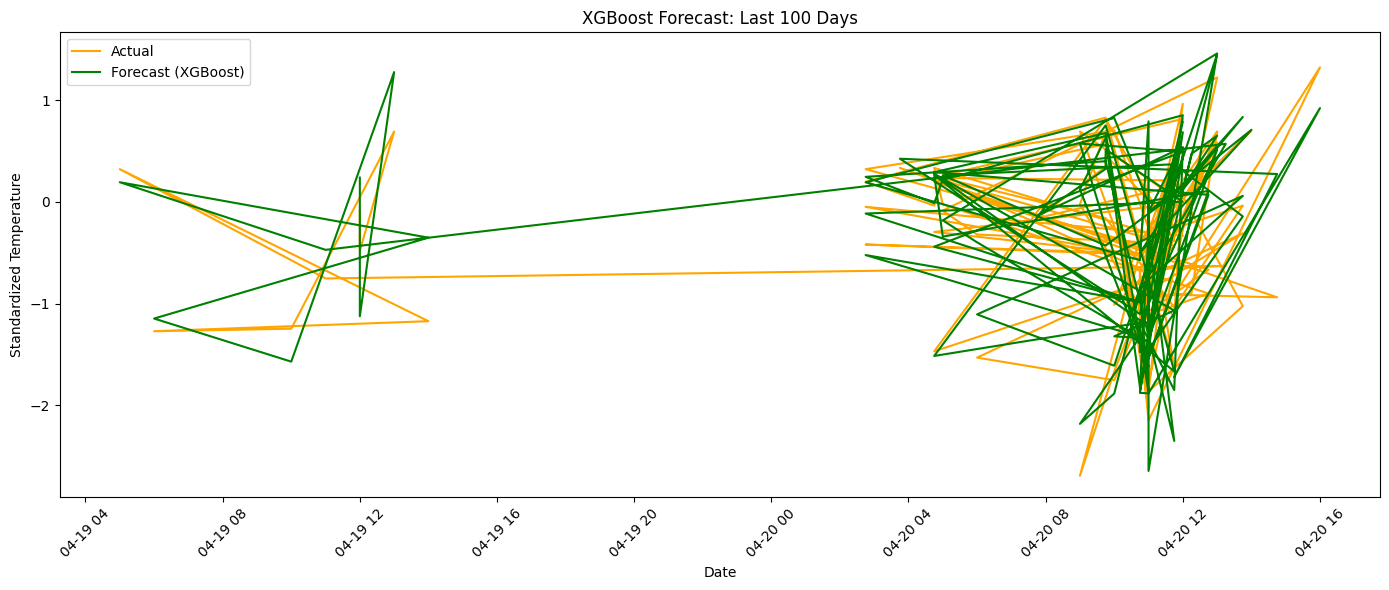

In [ ]:
# Plot only last 100 days to visualize better
plt.figure(figsize=(14, 6))
plt.plot(y_test.index[-100:], y_test[-100:], label='Actual', color='orange')
plt.plot(y_test.index[-100:], y_pred[-100:], label='Forecast (XGBoost)', color='green')
plt.title("XGBoost Forecast: Last 100 Days")
plt.xlabel("Date")
plt.ylabel("Standardized Temperature")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install tensorflow


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

# Use cleaned and resampled daily data
df_lstm = df.drop(columns=[col for col in ['feels_like_celsius', 'feels_like_fahrenheit'] if col in df.columns])
df_lstm = df_lstm.select_dtypes(include=np.number).dropna()

# Scale all features to [0, 1]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_lstm)

# Convert back to DataFrame with same column names
scaled_df = pd.DataFrame(scaled, columns=df_lstm.columns, index=df_lstm.index)

# Prepare sequences
def create_sequences(data, target_col, seq_len=14):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len:i].values)
        y.append(data.iloc[i][target_col])
    return np.array(X), np.array(y)

seq_len = 14  # Use 2 weeks of past data
X, y = create_sequences(scaled_df, target_col='temperature_celsius', seq_len=seq_len)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 14, 64)         │        22,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,721 (135.63 KB)

 Trainable params: 34,721 (135.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - loss: 0.0341 - val_loss: 0.0368
Epoch 2/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0219 - val_loss: 0.0365
Epoch 3/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.0219 - val_loss: 0.0361
Epoch 4/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0211 - val_loss: 0.0369
Epoch 5/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0207 - val_loss: 0.0410
Epoch 6/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0207 - val_loss: 0.0371
Epoch 7/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.0210 - val_loss: 0.0363
Epoch 8/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0208 - val_loss: 0.0386
Epoch 9/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0207 - val_loss: 0.0359
Epoch 10/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0201 - val_loss: 0.0401
Epoch 11/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.0203 - val_loss: 0.0362
Epoch 12/20
629/629 ━━━━━━━━━━

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
📊 LSTM/GRU Forecast Evaluation:
MAE:  0.1674
RMSE: 0.2004
MAPE: 0.7008


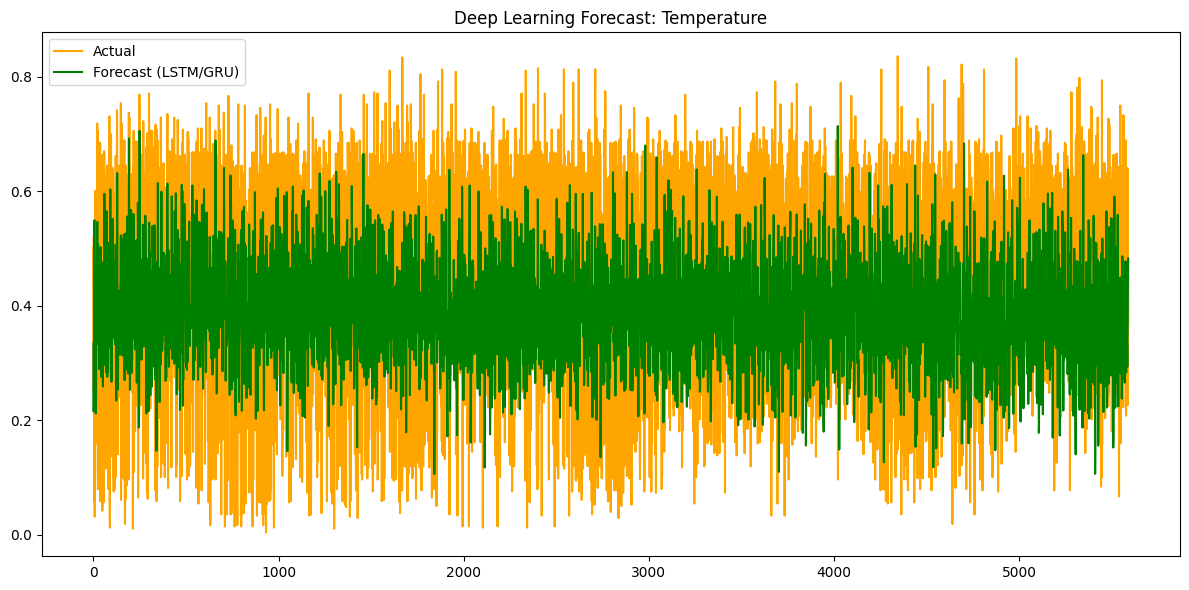

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Predict
y_pred = model.predict(X_test)

# Inverse scale if needed (optional, here it's already standardized)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print("📊 LSTM/GRU Forecast Evaluation:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='orange')
plt.plot(y_pred, label='Forecast (LSTM/GRU)', color='green')
plt.title("Deep Learning Forecast: Temperature")
plt.legend()
plt.tight_layout()
plt.show()


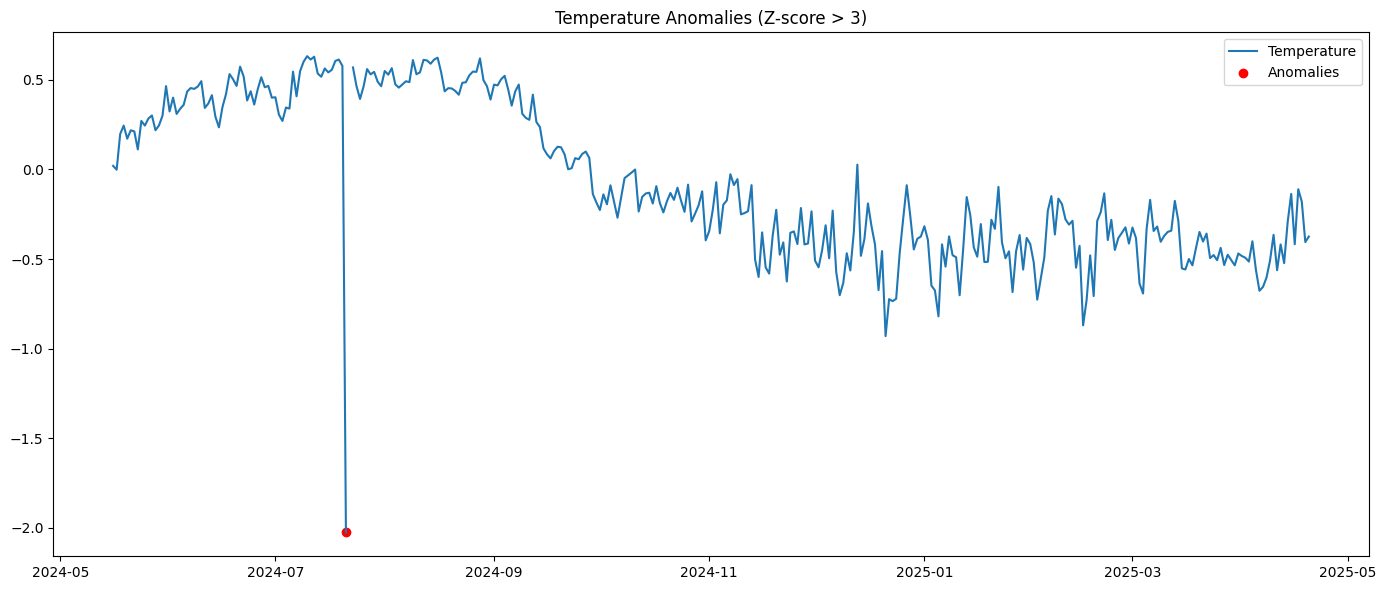

In [ ]:
import numpy as np

# Detect temperature anomalies using z-score
df_daily['temp_z'] = (df_daily['temperature_celsius'] - df_daily['temperature_celsius'].mean()) / df_daily['temperature_celsius'].std()
df_daily['is_anomaly'] = np.where(np.abs(df_daily['temp_z']) > 3, 1, 0)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['temperature_celsius'], label='Temperature')
plt.scatter(df_daily[df_daily['is_anomaly'] == 1].index, df_daily[df_daily['is_anomaly'] == 1]['temperature_celsius'], color='red', label='Anomalies')
plt.title("Temperature Anomalies (Z-score > 3)")
plt.legend()
plt.tight_layout()
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp611rrrg4/is35hk7g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp611rrrg4/q1z1f65e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28948', 'data', 'file=/tmp/tmp611rrrg4/is35hk7g.json', 'init=/tmp/tmp611rrrg4/q1z1f65e.json', 'output', 'file=/tmp/tmp611rrrg4/prophet_modelne53ffpu/prophet_model-20250422093844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:38:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:38:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


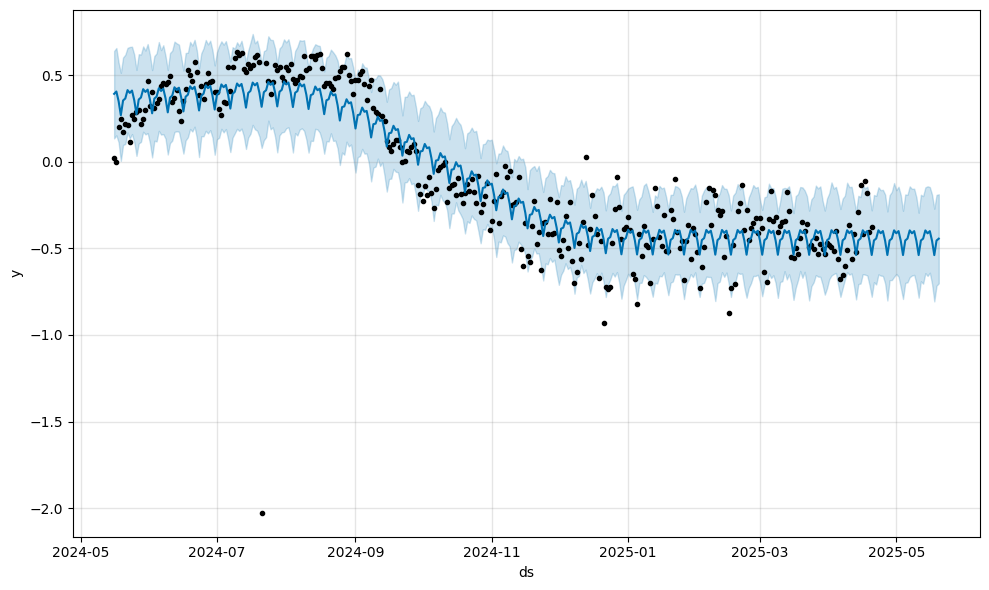

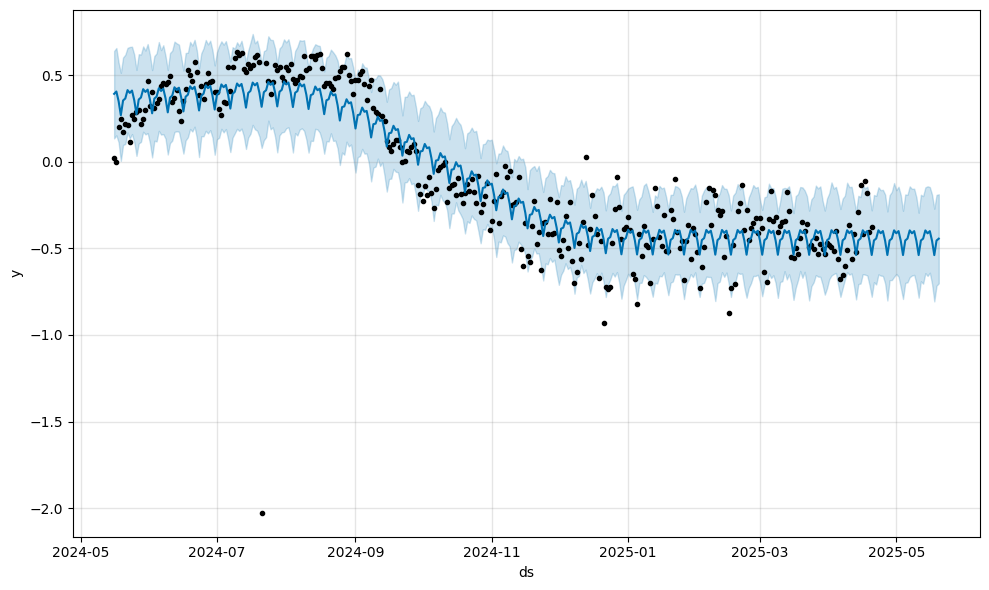

In [ ]:
!pip install prophet

from prophet import Prophet

# Prophet expects df with 'ds' and 'y'
prophet_df = df_daily.reset_index()[['last_updated', 'temperature_celsius']].rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})

model = Prophet()
model.fit(prophet_df)

# Future + forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot
model.plot(forecast)


In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Create time series from daily temp
ts = df_daily['temperature_celsius'].dropna()
split_idx = int(len(ts) * 0.8)
train, test = ts[:split_idx], ts[split_idx:]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train, order=(3, 1, 2))
model_arima_fit = model_arima.fit()
y_pred_arima = pd.Series(model_arima_fit.forecast(steps=len(test)), index=test.index)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
print("train NaNs:", train.isna().sum())
print("test NaNs:", test.isna().sum())


train NaNs: 0
test NaNs: 0


In [ ]:
train = train.dropna()
test = test.dropna()  # optional but helps alignment


In [ ]:
model_arima = ARIMA(train, order=(3, 1, 2))
model_arima_fit = model_arima.fit()

# Forecast with correct index
forecast_obj = model_arima_fit.get_forecast(steps=len(test))
y_pred_arima = pd.Series(forecast_obj.predicted_mean.values, index=test.index)

# Check for NaNs
print("ARIMA forecast NaNs:", y_pred_arima.isna().sum())
print(y_pred_arima.head())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA forecast NaNs: 0
last_updated
2025-02-12   -0.323485
2025-02-13   -0.330042
2025-02-14   -0.332657
2025-02-15   -0.333862
2025-02-16   -0.334371
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(model_arima_fit.summary())



                                SARIMAX Results                                
Dep. Variable:     temperature_celsius   No. Observations:                  271
Model:                  ARIMA(3, 1, 2)   Log Likelihood                  38.989
Date:                 Tue, 22 Apr 2025   AIC                            -65.977
Time:                         10:15:15   BIC                            -44.387
Sample:                              0   HQIC                           -57.308
                                 - 271                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1002      3.062      0.033      0.974      -5.901       6.101
ar.L2          0.0529      0.362      0.146      0.884      -0.657       0.763
ar.L3          0.0381      0.163      0.234 

In [ ]:
arima_eval = pd.concat([y_true, y_pred_arima], axis=1).dropna()
mae = mean_absolute_error(arima_eval.iloc[:, 0], arima_eval.iloc[:, 1])
print("ARIMA MAE:", mae)


ARIMA MAE: 0.140223860172307


In [ ]:
from prophet import Prophet

# Prepare data
prophet_df = df_daily[['temperature_celsius']].reset_index()
prophet_df.columns = ['ds', 'y']
prophet_train = prophet_df.iloc[:split_idx]

# Fit model
model_prophet = Prophet()
model_prophet.fit(prophet_train)

# Create future frame
future = model_prophet.make_future_dataframe(periods=len(test))
forecast_prophet = model_prophet.predict(future)

# Align forecast to test set
y_pred_prophet = forecast_prophet.set_index('ds')['yhat'].reindex(test.index).dropna()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp611rrrg4/q4pjp53m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp611rrrg4/faw7xnfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10623', 'data', 'file=/tmp/tmp611rrrg4/q4pjp53m.json', 'init=/tmp/tmp611rrrg4/faw7xnfl.json', 'output', 'file=/tmp/tmp611rrrg4/prophet_modelcwz7bzfl/prophet_model-20250422093923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:39:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:39:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from xgboost import XGBRegressor

# Prepare features (no leakage)
X_all = df_daily.drop(columns=['temperature_celsius']).dropna()
y_all = df_daily.loc[X_all.index, 'temperature_celsius']

X_train, X_test = X_all.iloc[:split_idx], X_all.iloc[split_idx:]
y_train, y_test = y_all.iloc[:split_idx], y_all.iloc[split_idx:]

# Train model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = pd.Series(model_xgb.predict(X_test), index=y_test.index)


In [ ]:
# Align all predictions to same index
common_index = test.index.intersection(y_pred_arima.index).intersection(y_pred_prophet.index).intersection(y_pred_xgb.index)

# Trim all predictions to common index
y_true = test.loc[common_index]
arima = y_pred_arima.loc[common_index]
prophet = y_pred_prophet.loc[common_index]
xgb = y_pred_xgb.loc[common_index]

# Simple average ensemble
ensemble = (arima + prophet + xgb) / 3


In [ ]:
df_eval = pd.concat([y_true, ensemble], axis=1)
print(df_eval.head())
print(df_eval.isna().sum())

              temperature_celsius   0
last_updated                         
2025-02-12              -0.286701 NaN
2025-02-13              -0.548432 NaN
2025-02-14              -0.426408 NaN
2025-02-15              -0.870368 NaN
2025-02-16              -0.727628 NaN
temperature_celsius     0
0                      67
dtype: int64


In [ ]:
ensemble_aligned = ensemble.copy()
ensemble_aligned.index = y_true.index  # this assumes same length and ordering

df_eval = pd.concat([y_true, ensemble_aligned], axis=1).dropna()
df_eval.columns = ['Actual', 'Forecast']  # rename for clarity

print(df_eval.head())
print(df_eval.isna().sum())


Empty DataFrame
Columns: [Actual, Forecast]
Index: []
Actual      0
Forecast    0
dtype: int64


In [ ]:
print(ensemble.head(10))
print(ensemble.index)


last_updated
2025-02-12   NaN
2025-02-13   NaN
2025-02-14   NaN
2025-02-15   NaN
2025-02-16   NaN
2025-02-17   NaN
2025-02-18   NaN
2025-02-19   NaN
2025-02-20   NaN
2025-02-21   NaN
dtype: float64
DatetimeIndex(['2025-02-12', '2025-02-13', '2025-02-14', '2025-02-15',
               '2025-02-16', '2025-02-17', '2025-02-18', '2025-02-19',
               '2025-02-20', '2025-02-21', '2025-02-22', '2025-02-23',
               '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27',
               '2025-02-28', '2025-03-01', '2025-03-02', '2025-03-03',
               '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07',
               '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
               '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15',
               '2025-03-16', '2025-03-17', '2025-03-18', '2025-03-19',
               '2025-03-20', '2025-03-21', '2025-03-22', '2025-03-23',
               '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27',
               '2025-

In [ ]:
print(y_true.head(10))
print(y_true.index)


last_updated
2025-02-12   -0.286701
2025-02-13   -0.548432
2025-02-14   -0.426408
2025-02-15   -0.870368
2025-02-16   -0.727628
2025-02-17   -0.479672
2025-02-18   -0.706633
2025-02-19   -0.286937
2025-02-20   -0.238158
2025-02-21   -0.133334
Name: temperature_celsius, dtype: float64
DatetimeIndex(['2025-02-12', '2025-02-13', '2025-02-14', '2025-02-15',
               '2025-02-16', '2025-02-17', '2025-02-18', '2025-02-19',
               '2025-02-20', '2025-02-21', '2025-02-22', '2025-02-23',
               '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27',
               '2025-02-28', '2025-03-01', '2025-03-02', '2025-03-03',
               '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07',
               '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
               '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15',
               '2025-03-16', '2025-03-17', '2025-03-18', '2025-03-19',
               '2025-03-20', '2025-03-21', '2025-03-22', '2025-03-23',
     

In [ ]:
print(len(y_pred))      # From LSTM
print(len(y_test))      # Target values
print(len(forecast))    # From ARIMA


5590
68
370


In [ ]:
# # Evaluation
# df_eval = pd.concat([y_true, ensemble], axis=1).dropna()
# y_true_clean = df_eval.iloc[:, 0]
# ensemble_clean = df_eval.iloc[:, 1]

# mae = mean_absolute_error(y_true_clean, ensemble_clean)
# rmse = mean_squared_error(y_true_clean, ensemble_clean, squared=False)

# print("📊 Ensemble Forecast Performance:")
# print(f"MAE:  {mae:.4f}")
# print(f"RMSE: {rmse:.4f}")

# # Plot
# plt.figure(figsize=(14, 6))
# plt.plot(y_true_clean.index, y_true_clean, label='Actual', color='orange')
# plt.plot(ensemble_clean.index, ensemble_clean, label='Ensemble Forecast', color='green')
# plt.title("Ensemble Forecast vs Actual Temperature")
# plt.xlabel("Date")
# plt.ylabel("Temperature (Standardized)")
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
# # Step 1: Drop NaNs **before** aligning
# y_true_clean = y_true.dropna()
# ensemble_clean = ensemble.dropna()

# # Step 2: Align on common index
# y_true_aligned, ensemble_aligned = y_true_clean.align(ensemble_clean, join='inner')

# # Step 3: Confirm data exists
# if len(y_true_aligned) == 0:
#     print("⚠️ Still no overlapping non-NaN data after cleaning.")
#     print("→ y_true_clean length:", len(y_true_clean))
#     print("→ ensemble_clean length:", len(ensemble_clean))
# else:
#     # Evaluation
#     mae = mean_absolute_error(y_true_aligned, ensemble_aligned)
#     rmse = mean_squared_error(y_true_aligned, ensemble_aligned, squared=False)

#     print("📊 Ensemble Forecast Performance:")
#     print(f"MAE:  {mae:.4f}")
#     print(f"RMSE: {rmse:.4f}")

#     # Plot
#     plt.figure(figsize=(14, 6))
#     plt.plot(y_true_aligned.index, y_true_aligned, label='Actual', color='orange')
#     plt.plot(ensemble_aligned.index, ensemble_aligned, label='Ensemble Forecast', color='green')
#     plt.title("Ensemble Forecast vs Actual Temperature")
#     plt.xlabel("Date")
#     plt.ylabel("Temperature (Standardized)")
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
# Align the two series to the same index first (this avoids the dropna wipeout)
y_true_aligned, ensemble_aligned = y_true.align(ensemble, join='inner')

# Now drop NaNs only if needed
df_eval = pd.concat([y_true_aligned, ensemble_aligned], axis=1).dropna()
y_true_clean = df_eval.iloc[:, 0]
ensemble_clean = df_eval.iloc[:, 1]

In [ ]:
# Fix ARIMA forecast index to match test set (usually needed)
y_pred_arima = pd.Series(y_pred_arima[:len(test)], index=test.index)

In [ ]:
print("🔍 After aligning to common_index:")
print("→ y_true:", len(y_true), "NaNs:", y_true.isna().sum())
print("→ arima:", len(arima), "NaNs:", arima.isna().sum())
print("→ prophet:", len(prophet), "NaNs:", prophet.isna().sum())
print("→ xgb:", len(xgb), "NaNs:", xgb.isna().sum())

🔍 After aligning to common_index:
→ y_true: 67 NaNs: 0
→ arima: 67 NaNs: 67
→ prophet: 67 NaNs: 0
→ xgb: 67 NaNs: 0


In [ ]:
print("y_pred_arima length:", len(y_pred_arima))
print("y_pred_arima index sample:", y_pred_arima.index[:5])

y_pred_arima length: 68
y_pred_arima index sample: DatetimeIndex(['2025-02-12', '2025-02-13', '2025-02-14', '2025-02-15',
               '2025-02-16'],
              dtype='datetime64[ns]', name='last_updated', freq=None)


In [ ]:
y_pred_arima = pd.Series(y_pred_arima[:67], index=test.index)

In [ ]:
common_index = test.index.intersection(y_pred_arima.index).intersection(y_pred_prophet.index).intersection(y_pred_xgb.index)

y_true = test.loc[common_index]
arima = y_pred_arima.loc[common_index]
prophet = y_pred_prophet.loc[common_index]
xgb = y_pred_xgb.loc[common_index]

ensemble = pd.concat([arima, prophet, xgb], axis=1).mean(axis=1, skipna=True)

In [ ]:
eval_df = pd.concat([y_true, ensemble], axis=1).dropna()
y_true_clean = eval_df.iloc[:, 0]
ensemble_clean = eval_df.iloc[:, 1]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true, ensemble)
rmse = np.sqrt(mean_squared_error(y_true, ensemble))


print("📊 Ensemble Forecast Performance:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

📊 Ensemble Forecast Performance:
MAE:  0.0858
RMSE: 0.1045


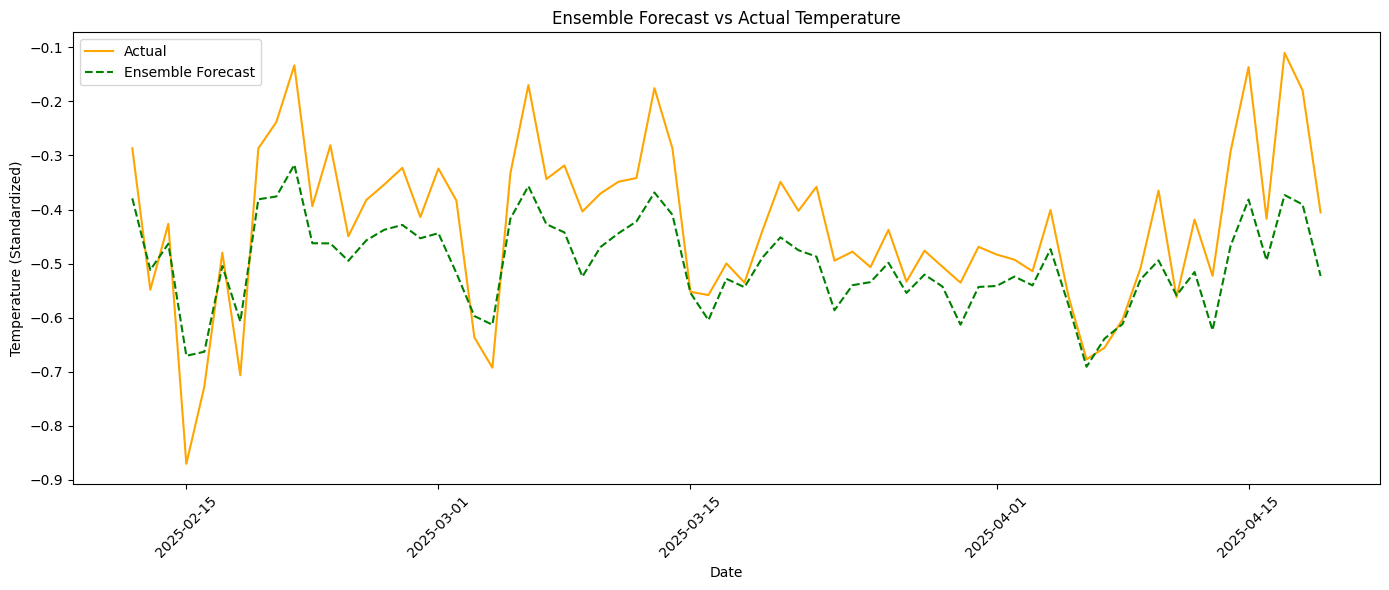

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_true_clean.index, y_true_clean, label='Actual', color='orange', linestyle='-')
plt.plot(ensemble_clean.index, ensemble_clean, label='Ensemble Forecast', color='green', linestyle='--')
plt.title("Ensemble Forecast vs Actual Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (Standardized)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("✅ Length of test set:", len(test))
print("✅ Length of ARIMA forecast:", len(y_pred_arima))
print("✅ Sample of test.index:", test.index[:5])
print("✅ Sample of y_pred_arima.index:", y_pred_arima.index[:5])
print("✅ Common index length:", len(common_index))


✅ Length of test set: 34
✅ Length of ARIMA forecast: 34
✅ Sample of test.index: DatetimeIndex(['2024-09-27', '2024-09-28', '2024-09-29', '2024-09-30',
               '2024-10-01'],
              dtype='datetime64[ns]', name='last_updated', freq=None)
✅ Sample of y_pred_arima.index: DatetimeIndex(['2024-09-27', '2024-09-28', '2024-09-29', '2024-09-30',
               '2024-10-01'],
              dtype='datetime64[ns]', name='last_updated', freq=None)
✅ Common index length: 32


In [ ]:
#print("✅ MAE from ARIMA only:", mean_absolute_error(test, y_pred_arima))


ValueError: Input contains NaN.

In [ ]:
df_daily = df.resample('D').mean(numeric_only=True)


In [ ]:
ts = df_daily['temperature_celsius'].dropna()


In [ ]:
split_index = int(len(ts) * 0.8)
train, test = ts[:split_index], ts[split_index:]


In [ ]:
print("ARIMA MAE:", mean_absolute_error(y_true, arima))
print("Prophet MAE:", mean_absolute_error(y_true, prophet))
print("XGBoost MAE:", mean_absolute_error(y_true, xgb))


ValueError: Input contains NaN.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Align and drop NaNs just in case
arima_eval = pd.concat([y_true, y_pred_arima], axis=1).dropna()
arima_y_true = arima_eval.iloc[:, 0]
arima_forecast = arima_eval.iloc[:, 1]

arima_mae = mean_absolute_error(arima_y_true, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(arima_y_true, arima_forecast))

print("📊 ARIMA Evaluation:")
print(f"MAE:  {arima_mae:.4f}")
print(f"RMSE: {arima_rmse:.4f}")


📊 ARIMA Evaluation:
MAE:  0.1402
RMSE: 0.1778


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ARIMA
arima_eval = pd.concat([y_true, y_pred_arima], axis=1).dropna()
arima_mae = mean_absolute_error(arima_eval.iloc[:, 0], arima_eval.iloc[:, 1])

# Prophet
prophet_eval = pd.concat([y_true, prophet], axis=1).dropna()
prophet_mae = mean_absolute_error(prophet_eval.iloc[:, 0], prophet_eval.iloc[:, 1])

# XGBoost
xgb_eval = pd.concat([y_true, xgb], axis=1).dropna()
xgb_mae = mean_absolute_error(xgb_eval.iloc[:, 0], xgb_eval.iloc[:, 1])

# Print Summary
print("📊 Model MAE Comparison:")
print(f"ARIMA MAE:   {arima_mae:.4f}")
print(f"Prophet MAE: {prophet_mae:.4f}")
print(f"XGBoost MAE: {xgb_mae:.4f}")


📊 Model MAE Comparison:
ARIMA MAE:   0.1402
Prophet MAE: 0.1754
XGBoost MAE: 0.0134


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ARIMA
arima_eval = pd.concat([y_true, y_pred_arima], axis=1).dropna()
arima_mae = mean_absolute_error(arima_eval.iloc[:, 0], arima_eval.iloc[:, 1])
arima_rmse = np.sqrt(mean_squared_error(arima_eval.iloc[:, 0], arima_eval.iloc[:, 1]))

# Prophet
prophet_eval = pd.concat([y_true, prophet], axis=1).dropna()
prophet_mae = mean_absolute_error(prophet_eval.iloc[:, 0], prophet_eval.iloc[:, 1])
prophet_rmse = np.sqrt(mean_squared_error(prophet_eval.iloc[:, 0], prophet_eval.iloc[:, 1]))

# XGBoost
xgb_eval = pd.concat([y_true, xgb], axis=1).dropna()
xgb_mae = mean_absolute_error(xgb_eval.iloc[:, 0], xgb_eval.iloc[:, 1])
xgb_rmse = np.sqrt(mean_squared_error(xgb_eval.iloc[:, 0], xgb_eval.iloc[:, 1]))

# Print Summary
print("📊 Model Evaluation Summary:")
print(f"ARIMA   → MAE: {arima_mae:.4f}, RMSE: {arima_rmse:.4f}")
print(f"Prophet → MAE: {prophet_mae:.4f}, RMSE: {prophet_rmse:.4f}")
print(f"XGBoost → MAE: {xgb_mae:.4f}, RMSE: {xgb_rmse:.4f}")


📊 Model Evaluation Summary:
ARIMA   → MAE: 0.1402, RMSE: 0.1778
Prophet → MAE: 0.1754, RMSE: 0.2091
XGBoost → MAE: 0.0134, RMSE: 0.0174


In [ ]:
ensemble_mae = mean_absolute_error(y_true_clean, ensemble_clean)
ensemble_rmse = np.sqrt(mean_squared_error(y_true_clean, ensemble_clean))

print(f"Ensemble→ MAE: {ensemble_mae:.4f}, RMSE: {ensemble_rmse:.4f}")


Ensemble→ MAE: 0.0858, RMSE: 0.1045


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


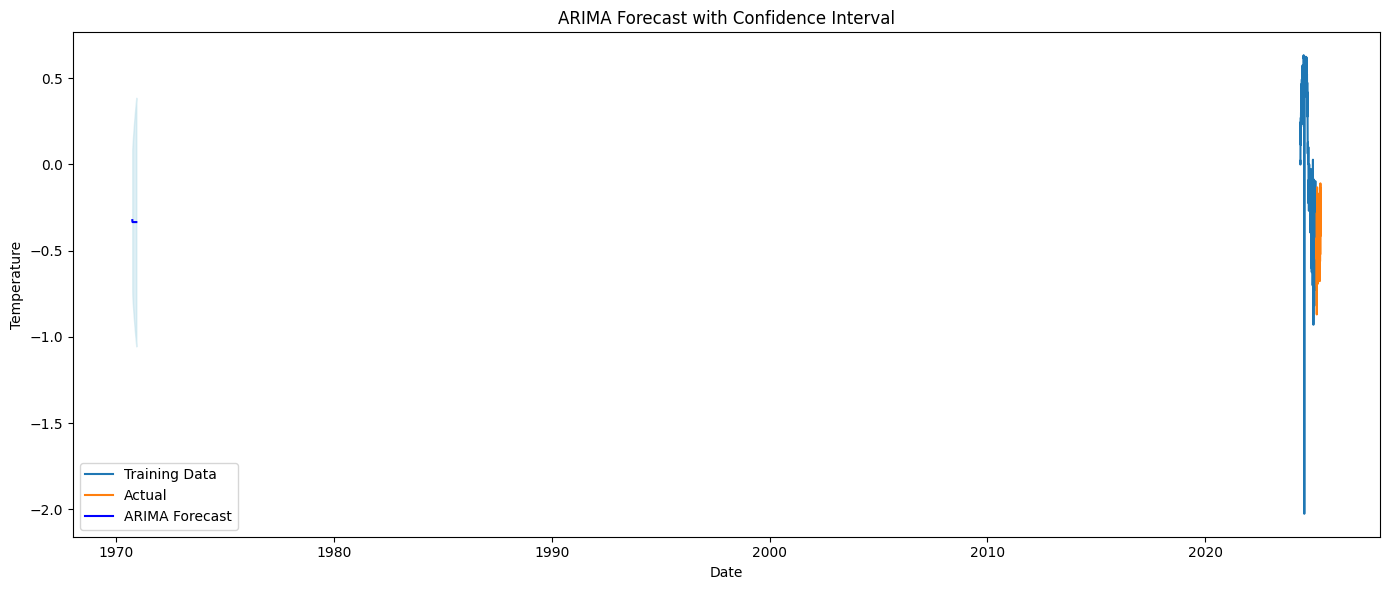

In [ ]:
forecast_obj = model_arima_fit.get_forecast(steps=len(test))
mean_forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual')
plt.plot(mean_forecast.index, mean_forecast, label='ARIMA Forecast', color='blue')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightblue', alpha=0.4)
plt.title("ARIMA Forecast with Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()


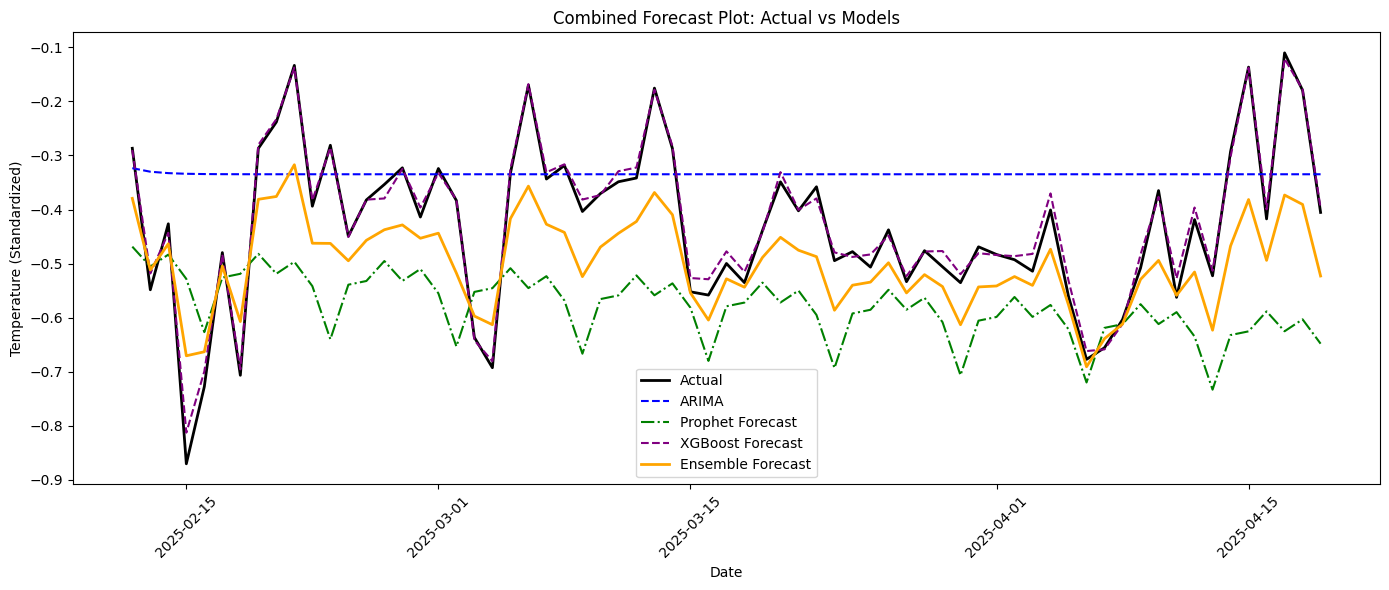

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Actual values
plt.plot(y_true.index, y_true, label='Actual', color='black', linewidth=2)

# Model forecasts
plt.plot(arima.index, arima, label='ARIMA', linestyle='dashed', color='blue')
plt.plot(prophet.index, prophet, label='Prophet Forecast', linestyle='dashdot', color='green')
plt.plot(xgb.index, xgb, label='XGBoost Forecast', linestyle='dashed', color='purple')

# Ensemble forecast
plt.plot(ensemble.index, ensemble, label='Ensemble Forecast', color='orange', linewidth=2)

plt.title("Combined Forecast Plot: Actual vs Models")
plt.xlabel("Date")
plt.ylabel("Temperature (Standardized)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print("ARIMA NaNs:", arima.isna().sum())
print(arima.head())


ARIMA NaNs: 0
last_updated
2025-02-12   -0.323485
2025-02-13   -0.330042
2025-02-14   -0.332657
2025-02-15   -0.333862
2025-02-16   -0.334371
Freq: D, dtype: float64


In [ ]:
print("✅ y_pred_arima preview:")
print(y_pred_arima.head())
print("NaNs in y_pred_arima:", y_pred_arima.isna().sum())

print("\n✅ arima preview:")
print(arima.head())
print("NaNs in arima:", arima.isna().sum())

print("\n✅ common_index preview:")
print(common_index[:5])


✅ y_pred_arima preview:
last_updated
2025-02-12   -0.323485
2025-02-13   -0.330042
2025-02-14   -0.332657
2025-02-15   -0.333862
2025-02-16   -0.334371
Freq: D, dtype: float64
NaNs in y_pred_arima: 0

✅ arima preview:
last_updated
2025-02-12   -0.323485
2025-02-13   -0.330042
2025-02-14   -0.332657
2025-02-15   -0.333862
2025-02-16   -0.334371
Freq: D, dtype: float64
NaNs in arima: 0

✅ common_index preview:
DatetimeIndex(['2025-02-12', '2025-02-13', '2025-02-14', '2025-02-15',
               '2025-02-16'],
              dtype='datetime64[ns]', name='last_updated', freq='D')


In [ ]:
y_pred_arima.index = common_index  # forcibly align index
arima = y_pred_arima


ValueError: Length mismatch: Expected axis has 68 elements, new values have 67 elements

In [ ]:
y_pred_arima = pd.Series(y_pred_arima.values[:len(common_index)], index=common_index)
arima = y_pred_arima
